# Problem Statement

Singapore was crowned the happiest country in Asia and ranked 25th in the UN's World Happiness Report 2023. While many Singaporeans doubt the results, our group decided to dive deeper to find out how Singapore achieved its ranking.

From the World Happiness Report 2023, we found many factors contributing to overall happiness in a country. Some factors include GDP, corruption, life expectancy.

Our project aims to understand which factors are the most important in predicting happiness in a country and hence build a model that best predicts happiness in a country. 

Doing so allows us to recommend what Singapore government can consider to maintain and improve its ranking of happiness in the world. Building the best model also allows us to track the performance of Singapore in terms of happiness.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.patches import Patch
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


# Data Description

Data definitions are taken from https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf


Country Name: Name of country

Year: Year of data (from 2008 to 2022)

Life Ladder: Variable for happiness score in a country (0 is worst, 10 is best)

Log GDP per capita: GDP per capita of a country 

Social Support: National average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”


Healthy life expectancy at birth: Average healthy life expectancies in years 


Freedom to make life choices: National average of responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”



Generosity: Generosity is the residual of regressing national average of response to the GWP question, “Have you donated money to a charity in the past month?” on GDP per capita



Perceptions of corruption: National average of the survey responses to two questions in the GWP: 

“Is corruption widespread throughout the government or not”,

“Is corruption widespread within businesses or not?” 



Positive affect: Average of three positive affect measures in GWP: laugh, enjoyment and doing interesting things

These measures are the responses to the following three questions, respectively:

“Did you smile or laugh a lot yesterday?”,

“Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”,

“Did you learn or do something interesting yesterday



Negative affect: Negative affect is defined as the average of three negative affect measures in GWP. They are worry, sadness and anger

These measures are the responses to the following three questions, respectively:

“Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”,

“Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?”,

“Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”


In [2]:
from google.colab import files
uploaded = files.upload()



Saving WHR2023.csv to WHR2023.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WHR2023.csv']))

#Data Cleaning

First, we take a look at the information of the data to make sense of what types of data we are dealing with.

In [4]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


The data seems to contain largely numerical data types, apart from the name of a country. 

Some numerical data such as Social Support and Perceptions of Corruption seems to be ranging between 0 and 1. After inspecting the data description it makes sense as the data came from binary questions which answers were either 0 or 1.



 ### Fill missing data with median 
We notice that there are some missing data in certain columns, and since the values are of numerical data type, we decidede to fill the missing values with the median. This is because it is the least biased value to fill data, this is compared to mean value which can be affected by outliers.



 ### Drop irrelevant variables
We also decided to drop the variables that do not hold any significance in predicting happiness in a country.

In [6]:
df.fillna(value = df.median(), inplace = True)
dfnew = df.drop(columns = ['year', 'Country name'])
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2199 non-null   float64
 1   Log GDP per capita                2199 non-null   float64
 2   Social support                    2199 non-null   float64
 3   Healthy life expectancy at birth  2199 non-null   float64
 4   Freedom to make life choices      2199 non-null   float64
 5   Generosity                        2199 non-null   float64
 6   Perceptions of corruption         2199 non-null   float64
 7   Positive affect                   2199 non-null   float64
 8   Negative affect                   2199 non-null   float64
dtypes: float64(9)
memory usage: 154.7 KB


<ipython-input-6-0cd454adf929>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(value = df.median(), inplace = True)


### Variables dropped

1. Year
2. Country name

These variables were deemed irrelavant as a country's name or the year in which the data was obtained would not have any effect on happiness of a country.

In [7]:
dfnew

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...
2194,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


# Exploratory Data Analysis 

After initial cleaning of irrelevant variables, we plot a heatmap to visualise the correlations of the variables to find out how strong the relationships of variables are to one another.

<Axes: >

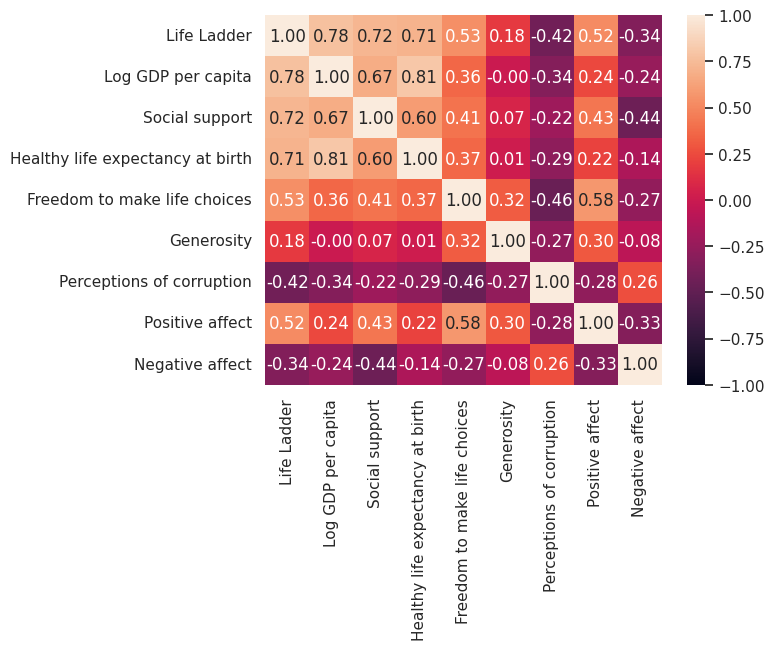

In [8]:
sb.heatmap(dfnew.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

Variables that have a high correlation, indicates a strong relationship with life ladder while those that have a low correlation, indicates a weak relationship with life ladder. 

We can see that each variable against the life ladder the ranking is as follows (highest correlation to lowest correlation):

1. Log GDP per capita
2. Social support
3. Healthy life expectancy at birth
4. Freedom to make life choices
5. Positive affect
6. Perceptions of corruption
7. Negative affect
8. Generosity

From the correlation table, we can see that the three variable "Perceptions of corruption", "Generosity" and "Negative affect" have low correlation compared to the others. These three variable most likely have the weakest relationship with Life Ladder and hence are the least important in predicting Life Ladder in a country.

We decided to drop variables with low correlation against life ladder (below 0.5) as they would not be useful to predict life ladder of a country due to their weak relationships.



In [9]:
dfclean2 = dfnew.drop(columns = ['Generosity', 'Negative affect', 'Perceptions of corruption'])
dfclean = dfnew.drop(columns = ['Generosity', 'Negative affect', 'Perceptions of corruption'])
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       2199 non-null   float64
 1   Log GDP per capita                2199 non-null   float64
 2   Social support                    2199 non-null   float64
 3   Healthy life expectancy at birth  2199 non-null   float64
 4   Freedom to make life choices      2199 non-null   float64
 5   Positive affect                   2199 non-null   float64
dtypes: float64(6)
memory usage: 103.2 KB


### Variables dropped due to weak correlation

1. Generosity
2. Negative affect
3. Perceptions of corruption

After which, we decided to plot the violin plot, histogram and boxplot of each variable, in order to analyse each variable separately.

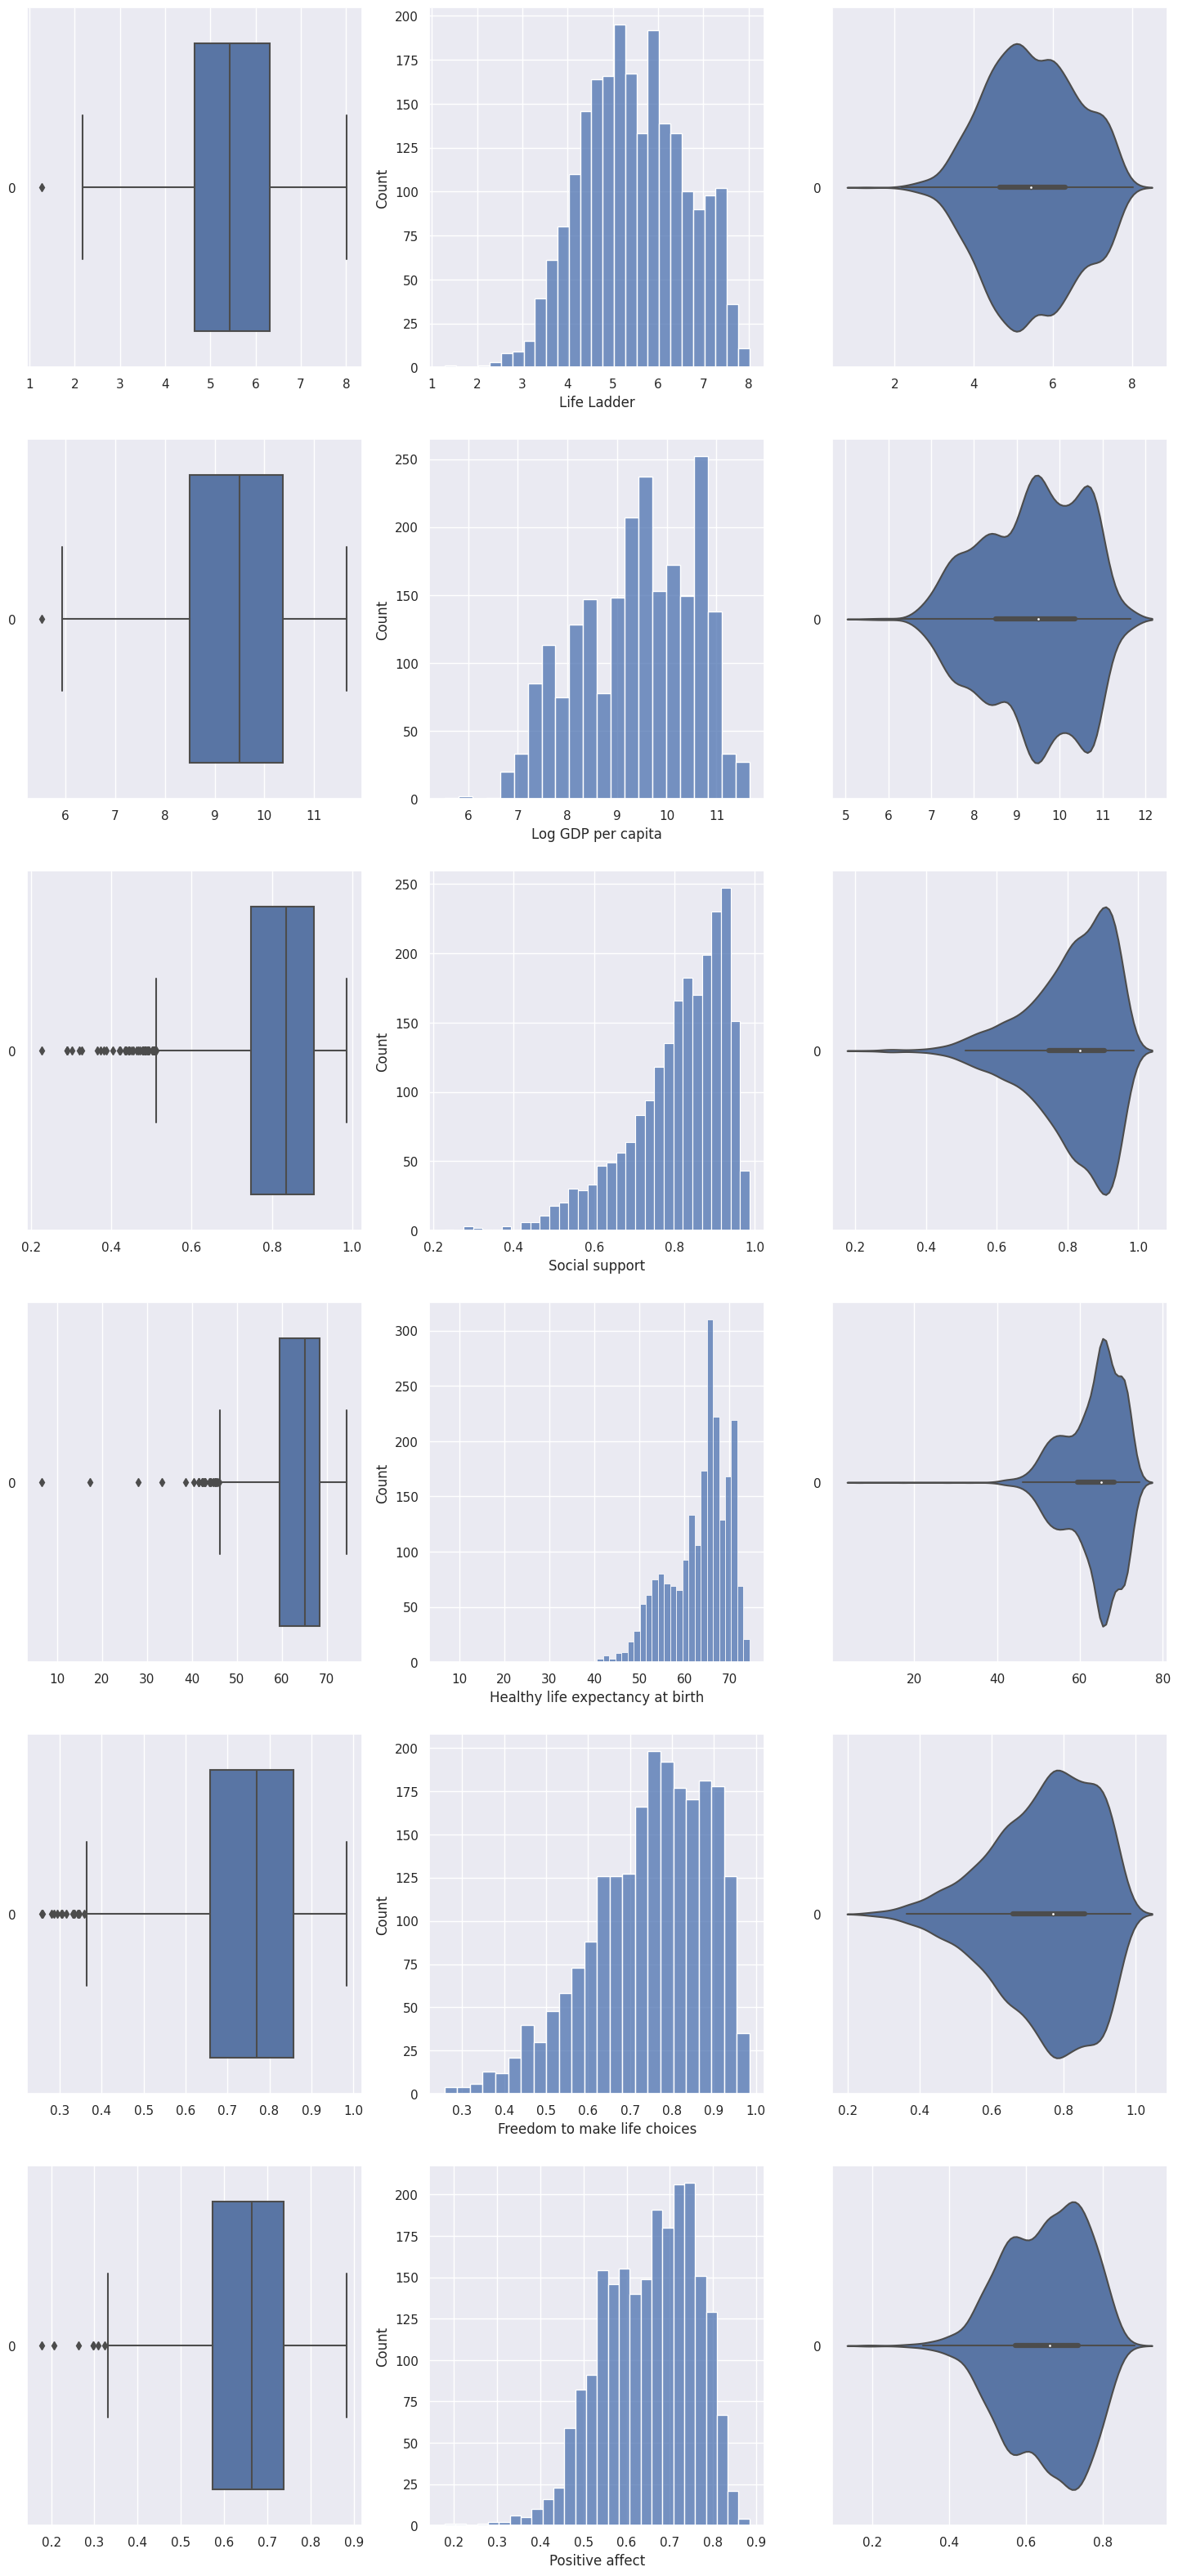

In [10]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 40))

count = 0
for var in dfclean:
        sb.boxplot(data = dfclean[var], orient = 'h', ax = axes[count,0])
        sb.histplot(data = dfclean[var], ax = axes[count,1])
        sb.violinplot(data = dfclean[var], orient = "h", ax = axes[count,2])
        count += 1

By observation of the box plots, we notice that there are many outliers in some variables. To take a more precise approach, we counted the actual number of outliers.

### Settling outliers

In [11]:
# Calculate the quartiles
Q1 = dfclean.quantile(0.25)
Q3 = dfclean.quantile(0.75)

# Rule to identify outliers
rule = ((dfclean < (Q1 - 1.5 * (Q3 - Q1))) | (dfclean > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

Life Ladder                          1
Log GDP per capita                   1
Social support                      52
Healthy life expectancy at birth    26
Freedom to make life choices        15
Positive affect                      7
dtype: int64

We notice that the variables with outliers in order of most outliers to least:

1. Social Support
2. Healthy life expectancy at birth 
3. Freedom to make life choices
4. Positive affect
5. Log GDP per capita

This is expected for values of "social support" and "freedom to make life choices" are attained by response to binary questions (0 or 1). 

We wish to drop the outliers in hopes that it would increase the correlation between the variables and life ladder and hence improve accuracy of our model later on.



In [12]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column
outliers.value_counts()

False    2111
True       88
dtype: int64

In [13]:
# Which row indices correspond to outliers in the dataframe?
outliertrue = outliers.index[outliers == True]
outliertrue

Int64Index([   0,    5,    9,   10,   11,   12,   13,  134,  147,  148,  181,
             182,  183,  186,  187,  188,  189,  190,  191,  192,  193,  194,
             215,  216,  218,  288,  289,  290,  292,  344,  345,  346,  347,
             348,  349,  350,  420,  475,  610,  676,  766,  767,  768,  769,
             770,  771,  774,  837,  883,  884, 1114, 1116, 1117, 1118, 1119,
            1120, 1121, 1168, 1179, 1186, 1192, 1333, 1335, 1336, 1337, 1487,
            1488, 1491, 1637, 1647, 1709, 1759, 1830, 1884, 1950, 1951, 1952,
            1953, 1954, 1955, 1956, 1995, 2134, 2182, 2183, 2184, 2185, 2186],
           dtype='int64')

In [14]:
# Remove the outliers based on the row indices obtained above
dfclean.drop(axis = 0,               # 0 drops row 1 drops column
            index = outliertrue, # this takes a list as input
            inplace = True)         # not overwritten by default 

dfclean

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect
1,4.402,7.509,0.552,50.800,0.679,0.481
2,4.758,7.614,0.539,51.100,0.600,0.517
3,3.832,7.581,0.521,51.400,0.496,0.480
4,3.783,7.661,0.521,51.700,0.531,0.614
6,3.131,7.671,0.526,52.300,0.509,0.492
...,...,...,...,...,...,...
2194,3.616,7.783,0.775,52.625,0.763,0.658
2195,2.694,7.698,0.759,53.100,0.632,0.658
2196,3.160,7.596,0.717,53.575,0.643,0.661
2197,3.155,7.657,0.685,54.050,0.668,0.610


# Checking for overfitting

A model thats fits the training set well but testing set poorly is said to be overfit to the training set and a model that fits both sets poorly is said to be underfit.

Overfitting can occur due to a model being trained "too well", in other words, the model is too custom-tailored to the train data such that it would perform poorly when placed in a different sets of data. Such a model will not fit future observations and affect accuracy of prediction of future data.

Hence, we want to make sure that we have not "overfitted" our model by including too many predictor variables. If overfitted, one of the actions that can be implemented include reducing the number of parameters in our regression model. 

Train Set : (1759, 5) (1759, 1)
Test Set  : (440, 5) (440, 1)
Intercept 	: b =  [-3.78964574]
Coefficients 	: a =  [[0.41489843 1.76548174 0.02705941 0.77312052 2.53297909]]


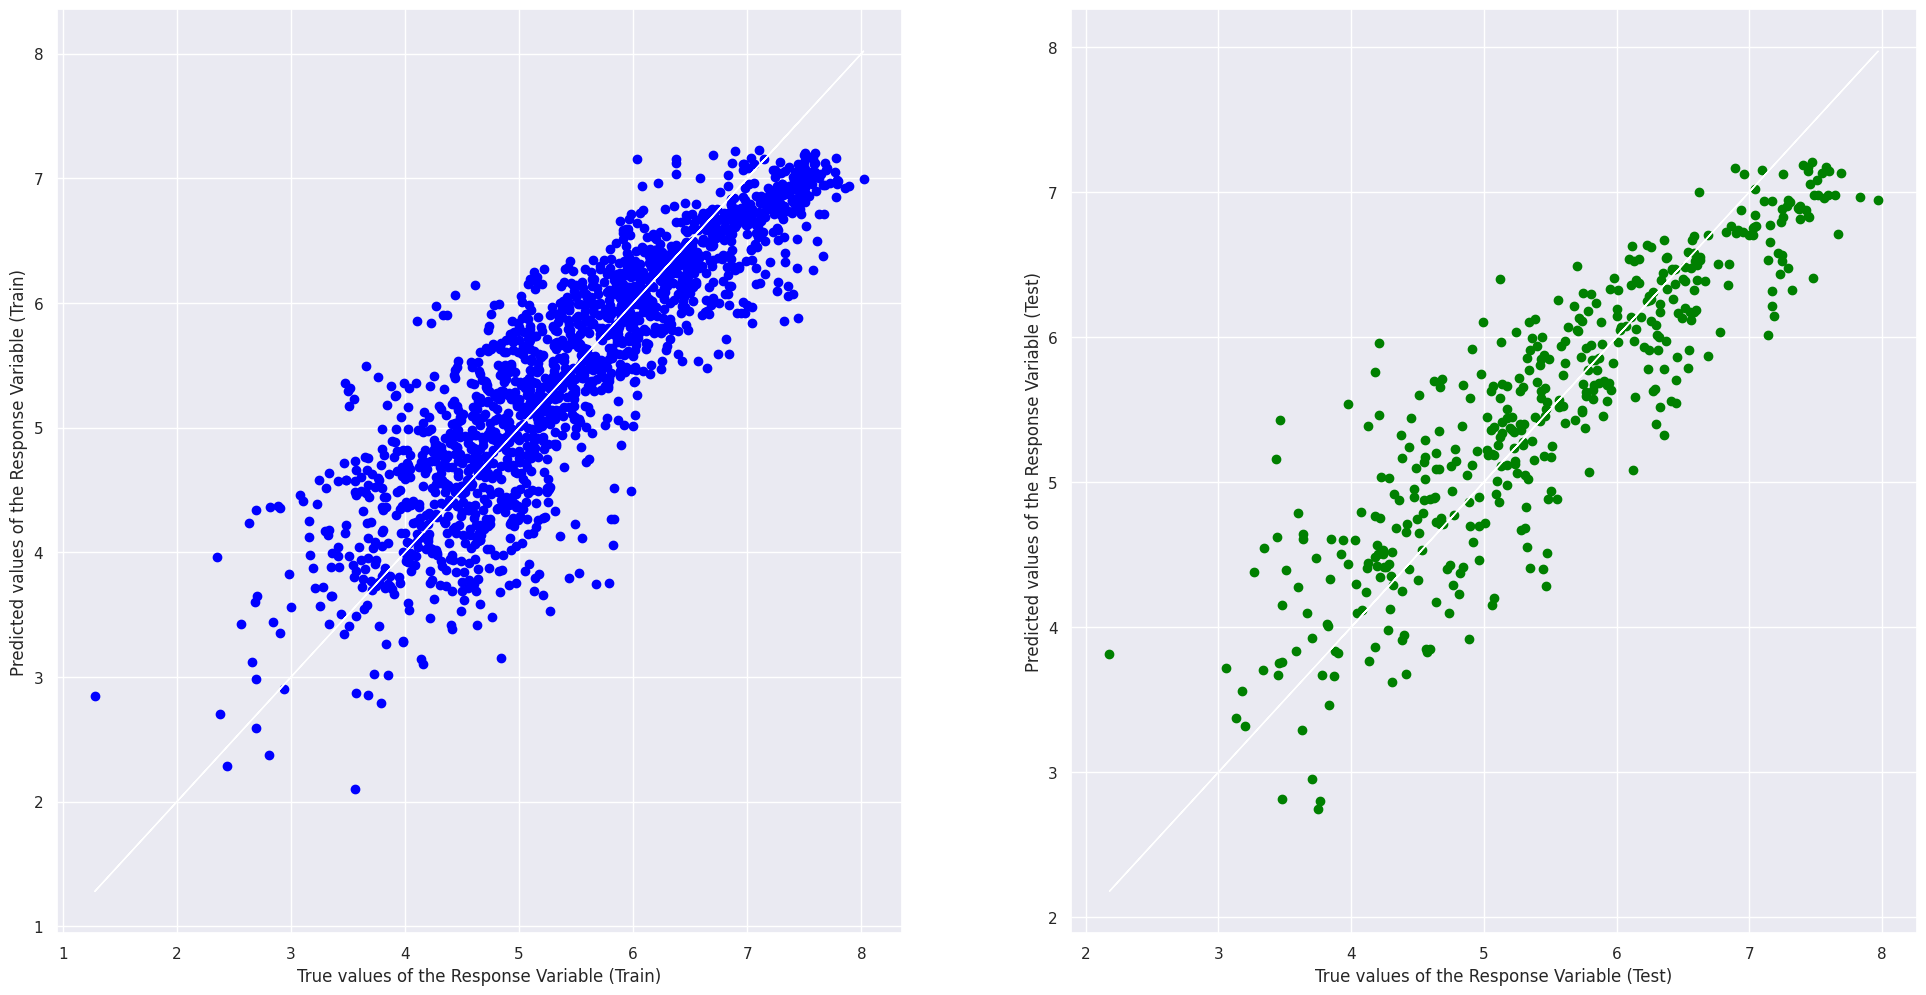

Explained Variance (R^2) on Train Set 	: 0.7565295551398689
Explained Variance (R^2) on Test Set 	: 0.7830400641183496
Mean Squared Error (MSE) on Train Set 	: 0.30730671948178584
Mean Squared Error (MSE) on Test Set 	: 0.278114018425742


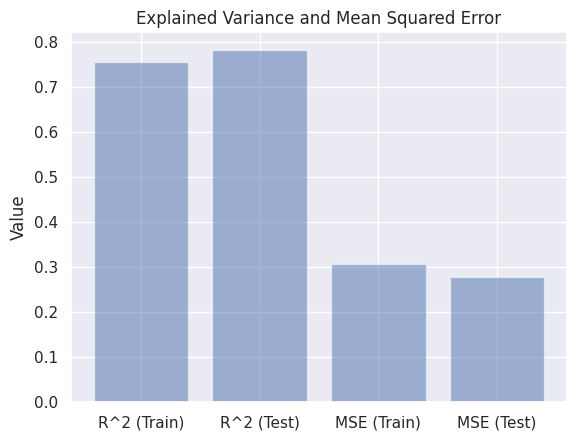

In [15]:
#Multi-variate linear regression (Predictors: 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect')
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train = linreg.score(x_train, y_train)
r2_test = linreg.score(x_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Create a bar graph to display the R^2 and MSE values
labels = ['R^2 (Train)', 'R^2 (Test)', 'MSE (Train)', 'MSE (Test)']
values = [r2_train, r2_test, mse_train, mse_test]
x_pos = np.arange(len(labels))

plt.bar(x_pos, values, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Value')
plt.title('Explained Variance and Mean Squared Error')

plt.show()

r2_train_0 = linreg.score(x_train, y_train)
r2_test_0 = linreg.score(x_test, y_test)
mse_train_0 = mean_squared_error(y_train, y_train_pred)
mse_test_0 = mean_squared_error(y_test, y_test_pred)

Comparing the Explained Variance (R^2) and Mean Squared Error (MSE) between the train and test set, we can see that our model do not show signs of overfitting.

This is because if our model is overfitted, we will typically observe a very low training MSE and a significantly higher testing MSE. 

Therefore, we can proceed to determine which predictors best predicts happiness in a country by checking which variable affects our model most.

# Uni-Variate Linear Regression

We used uni-variate linear regression on each variable to see which variable would be the best in predicting happiness in a country.

Train Set : (1688, 1) (1688, 1)
Test Set  : (423, 1) (423, 1)
Intercept 	: b =  [-1.69923607]
Coefficients 	: a =  [[0.76603946]]


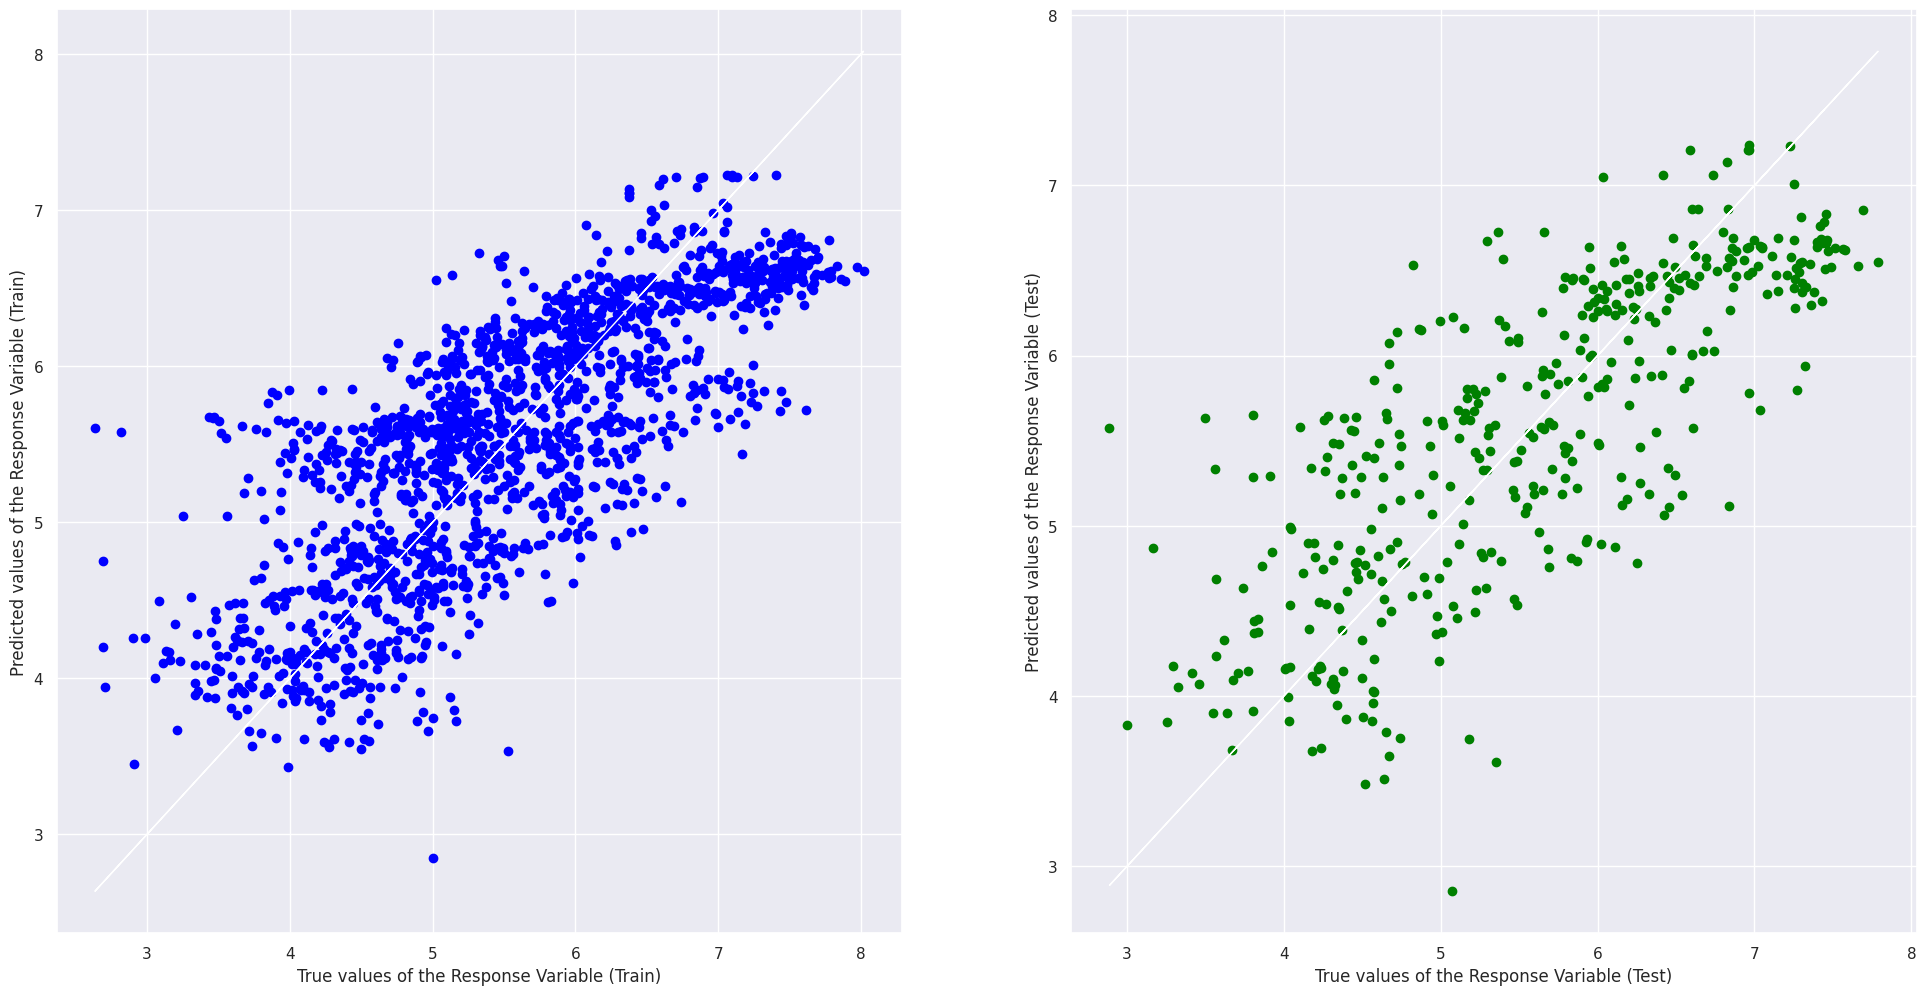

Explained Variance (R^2) on Train Set 	: 0.602714983677126
Explained Variance (R^2) on Test Set 	: 0.5959335036421525
Mean Squared Error (MSE) on Train Set 	: 0.46637733816477095
Mean Squared Error (MSE) on Test Set 	: 0.501689391939121


In [16]:
#Uni-variate linear regression (Predictors: 'Log GDP per capita')
y = pd.DataFrame(dfclean['Life Ladder'])
x = pd.DataFrame(dfclean['Log GDP per capita'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train_1 = linreg.score(x_train, y_train)
r2_test_1 = linreg.score(x_test, y_test)
mse_train_1 = mean_squared_error(y_train, y_train_pred)
mse_test_1 = mean_squared_error(y_test, y_test_pred)

Train Set : (1688, 1) (1688, 1)
Test Set  : (423, 1) (423, 1)
Intercept 	: b =  [-0.46153523]
Coefficients 	: a =  [[7.29264505]]


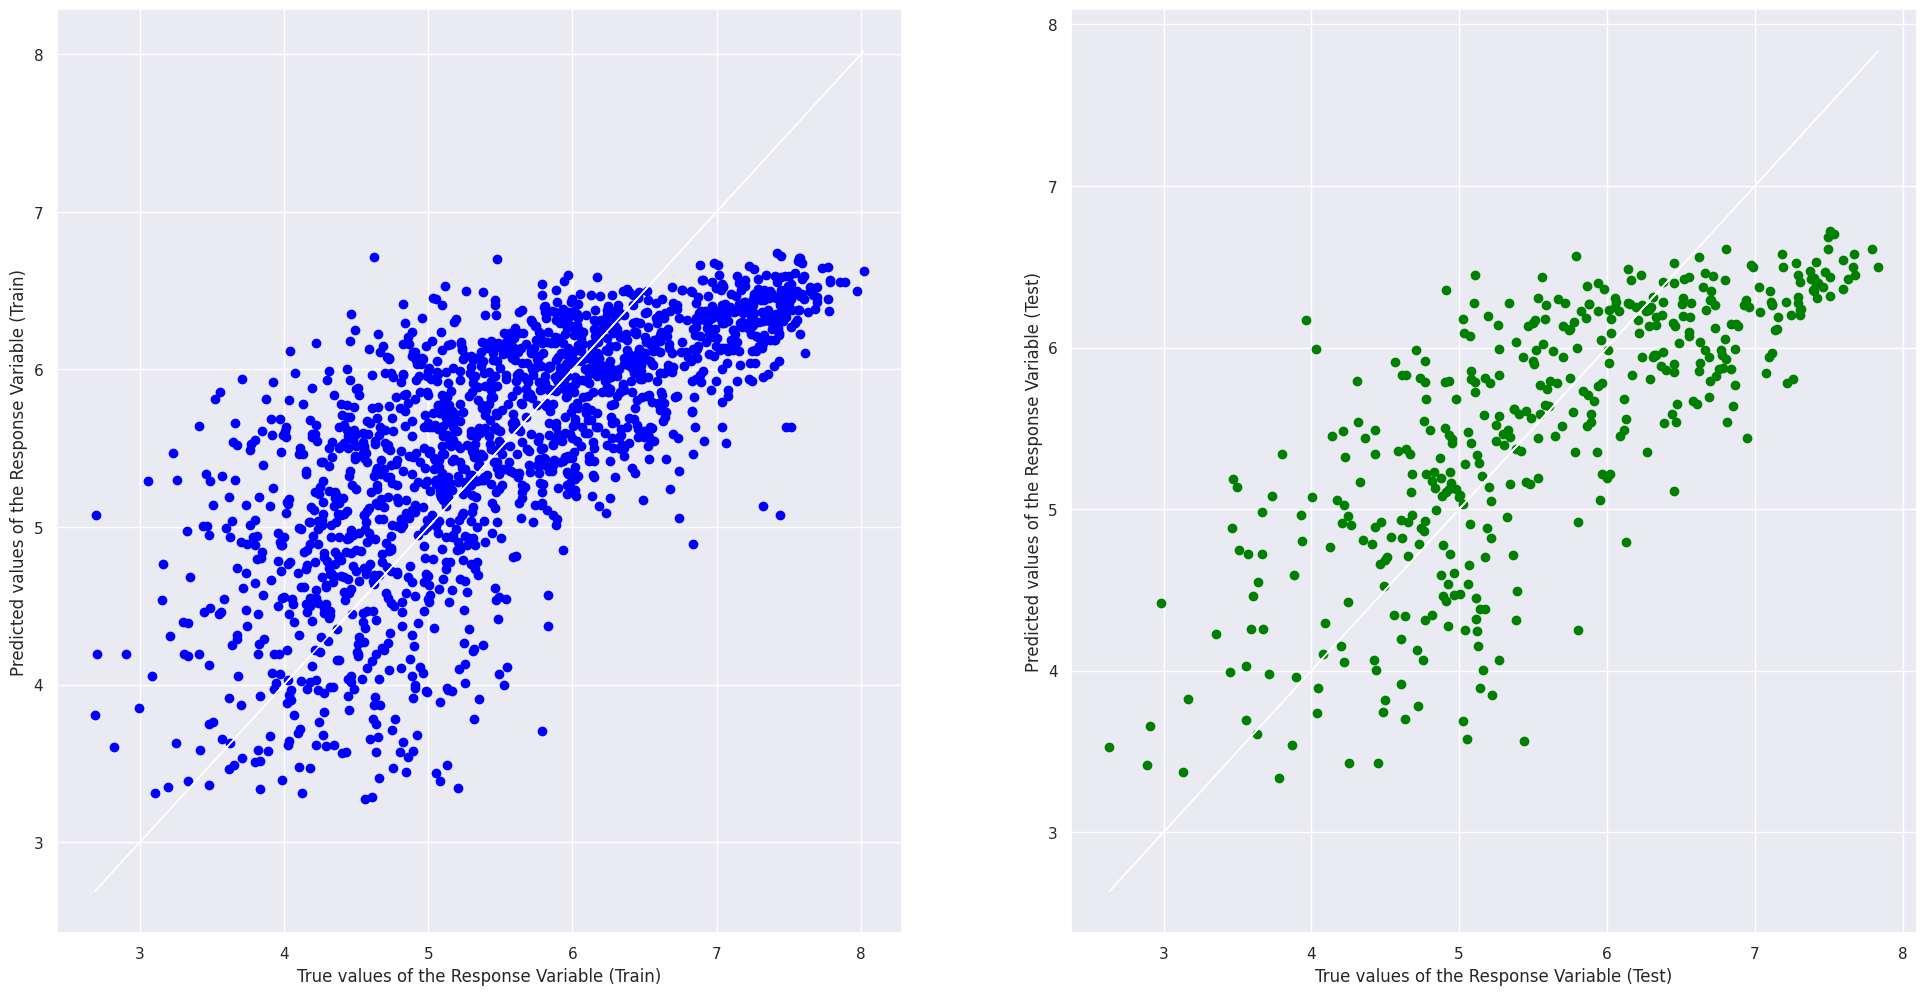

Explained Variance (R^2) on Train Set 	: 0.49861917154431745
Explained Variance (R^2) on Test Set 	: 0.5610035370637668
Mean Squared Error (MSE) on Train Set 	: 0.5915083680961042
Mean Squared Error (MSE) on Test Set 	: 0.5339750127822799


In [17]:
#Uni-variate linear regression (Predictors: 'Social support')
y = pd.DataFrame(dfclean['Life Ladder'])
x = pd.DataFrame(dfclean['Social support'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train_2 = linreg.score(x_train, y_train)
r2_test_2 = linreg.score(x_test, y_test)
mse_train_2 = mean_squared_error(y_train, y_train_pred)
mse_test_2 = mean_squared_error(y_test, y_test_pred)

Train Set : (1759, 1) (1759, 1)
Test Set  : (440, 1) (440, 1)
Intercept 	: b =  [-2.11609794]
Coefficients 	: a =  [[0.12001228]]


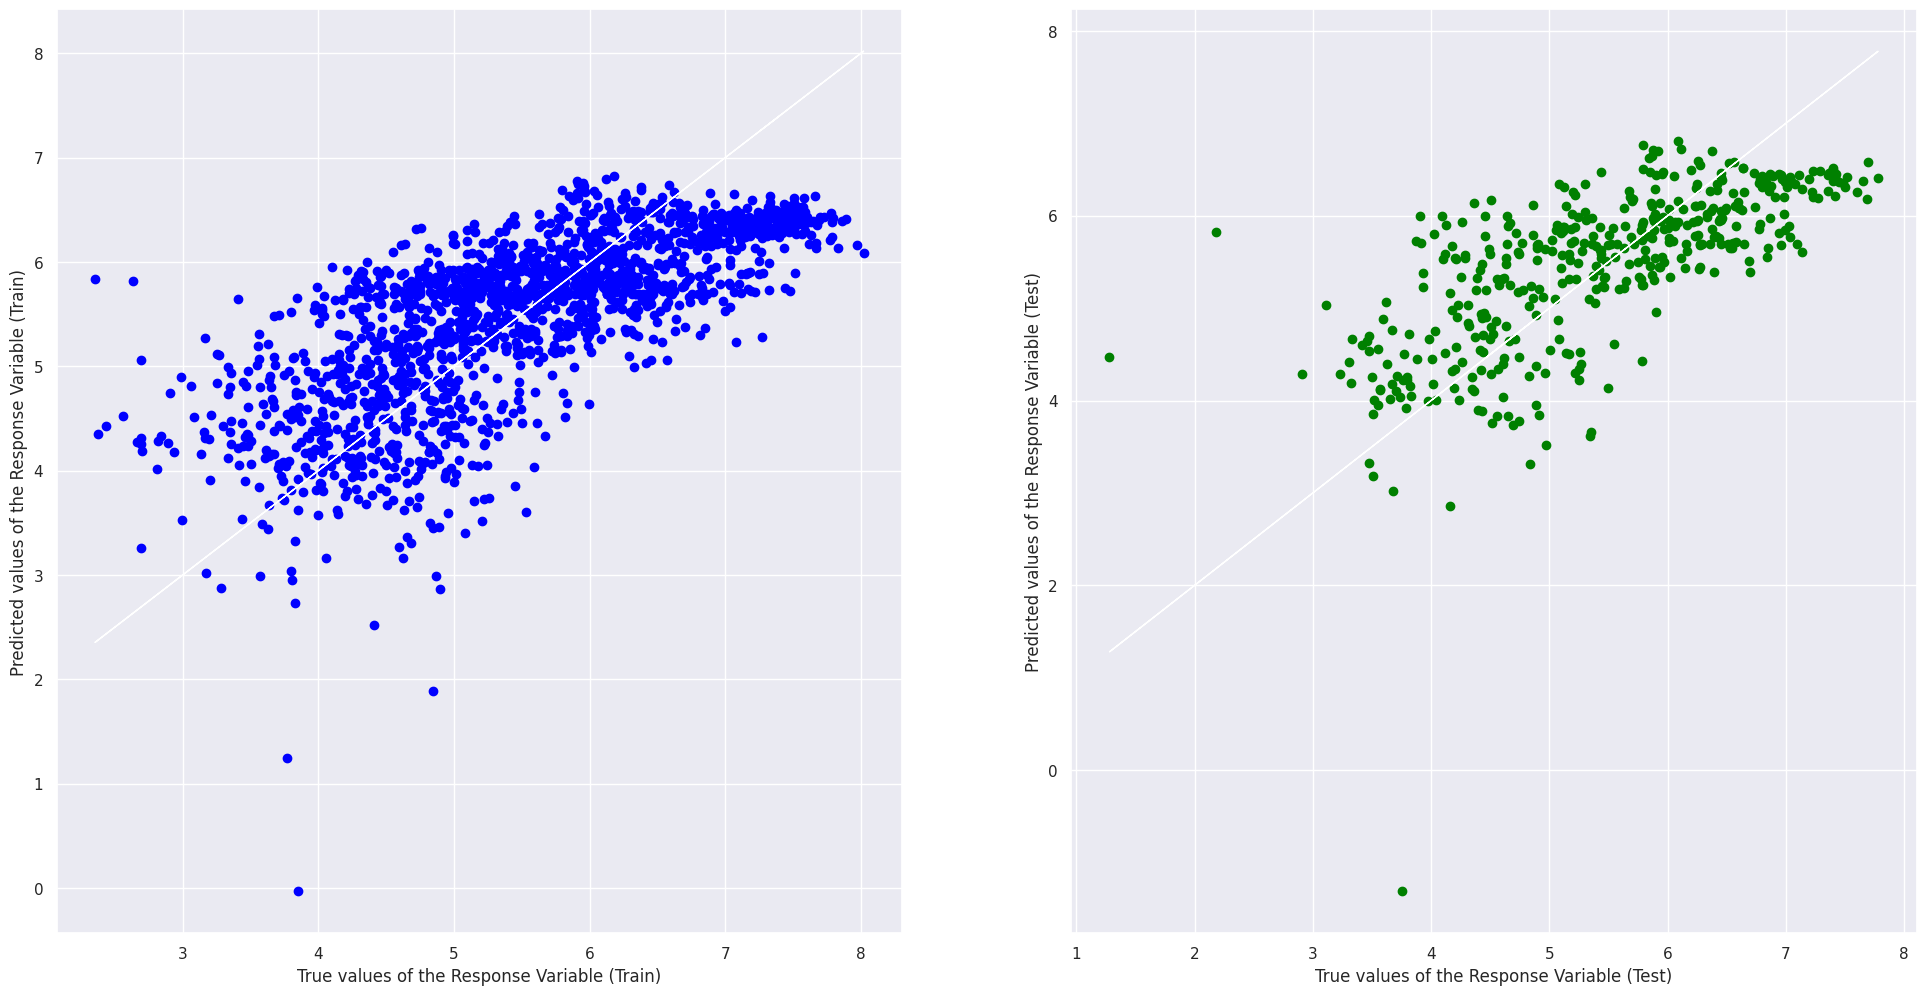

Explained Variance (R^2) on Train Set 	: 0.5151230859959166
Explained Variance (R^2) on Test Set 	: 0.45955529403948325
Mean Squared Error (MSE) on Train Set 	: 0.6139197066033596
Mean Squared Error (MSE) on Test Set 	: 0.683401654821025


In [18]:
#Uni-variate linear regression (Predictors: 'Healthy life expectancy at birth')
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2['Healthy life expectancy at birth'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train_3 = linreg.score(x_train, y_train)
r2_test_3 = linreg.score(x_test, y_test)
mse_train_3 = mean_squared_error(y_train, y_train_pred)
mse_test_3 = mean_squared_error(y_test, y_test_pred)

Train Set : (1759, 1) (1759, 1)
Test Set  : (440, 1) (440, 1)
Intercept 	: b =  [2.26259396]
Coefficients 	: a =  [[4.30695326]]


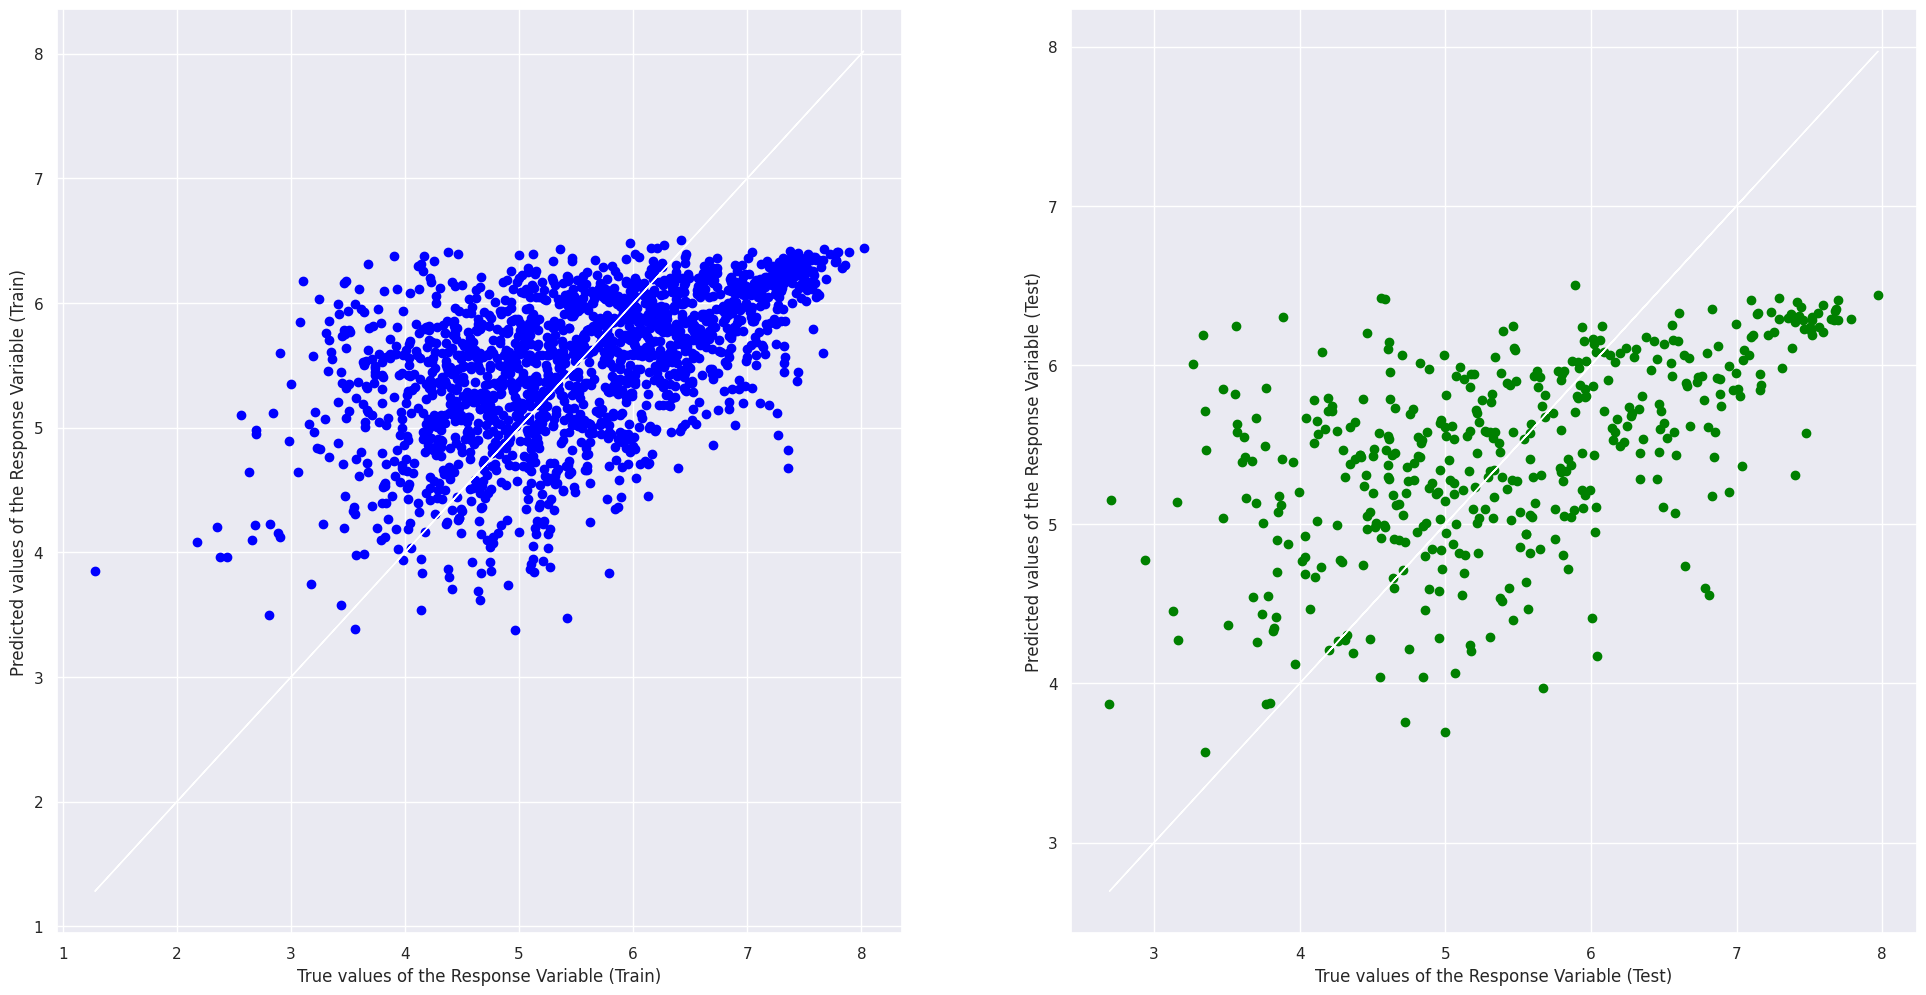

Explained Variance (R^2) on Train Set 	: 0.28321961693284947
Explained Variance (R^2) on Test Set 	: 0.28178409089819334
Mean Squared Error (MSE) on Train Set 	: 0.9047972219023775
Mean Squared Error (MSE) on Test Set 	: 0.917624598716194


In [19]:
#Uni-variate linear regression (Predictors: 'Freedom to make life choices')
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2['Freedom to make life choices'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train_4 = linreg.score(x_train, y_train)
r2_test_4 = linreg.score(x_test, y_test)
mse_train_4 = mean_squared_error(y_train, y_train_pred)
mse_test_4 = mean_squared_error(y_test, y_test_pred)

Train Set : (1759, 1) (1759, 1)
Test Set  : (440, 1) (440, 1)
Intercept 	: b =  [2.00827489]
Coefficients 	: a =  [[5.3281803]]


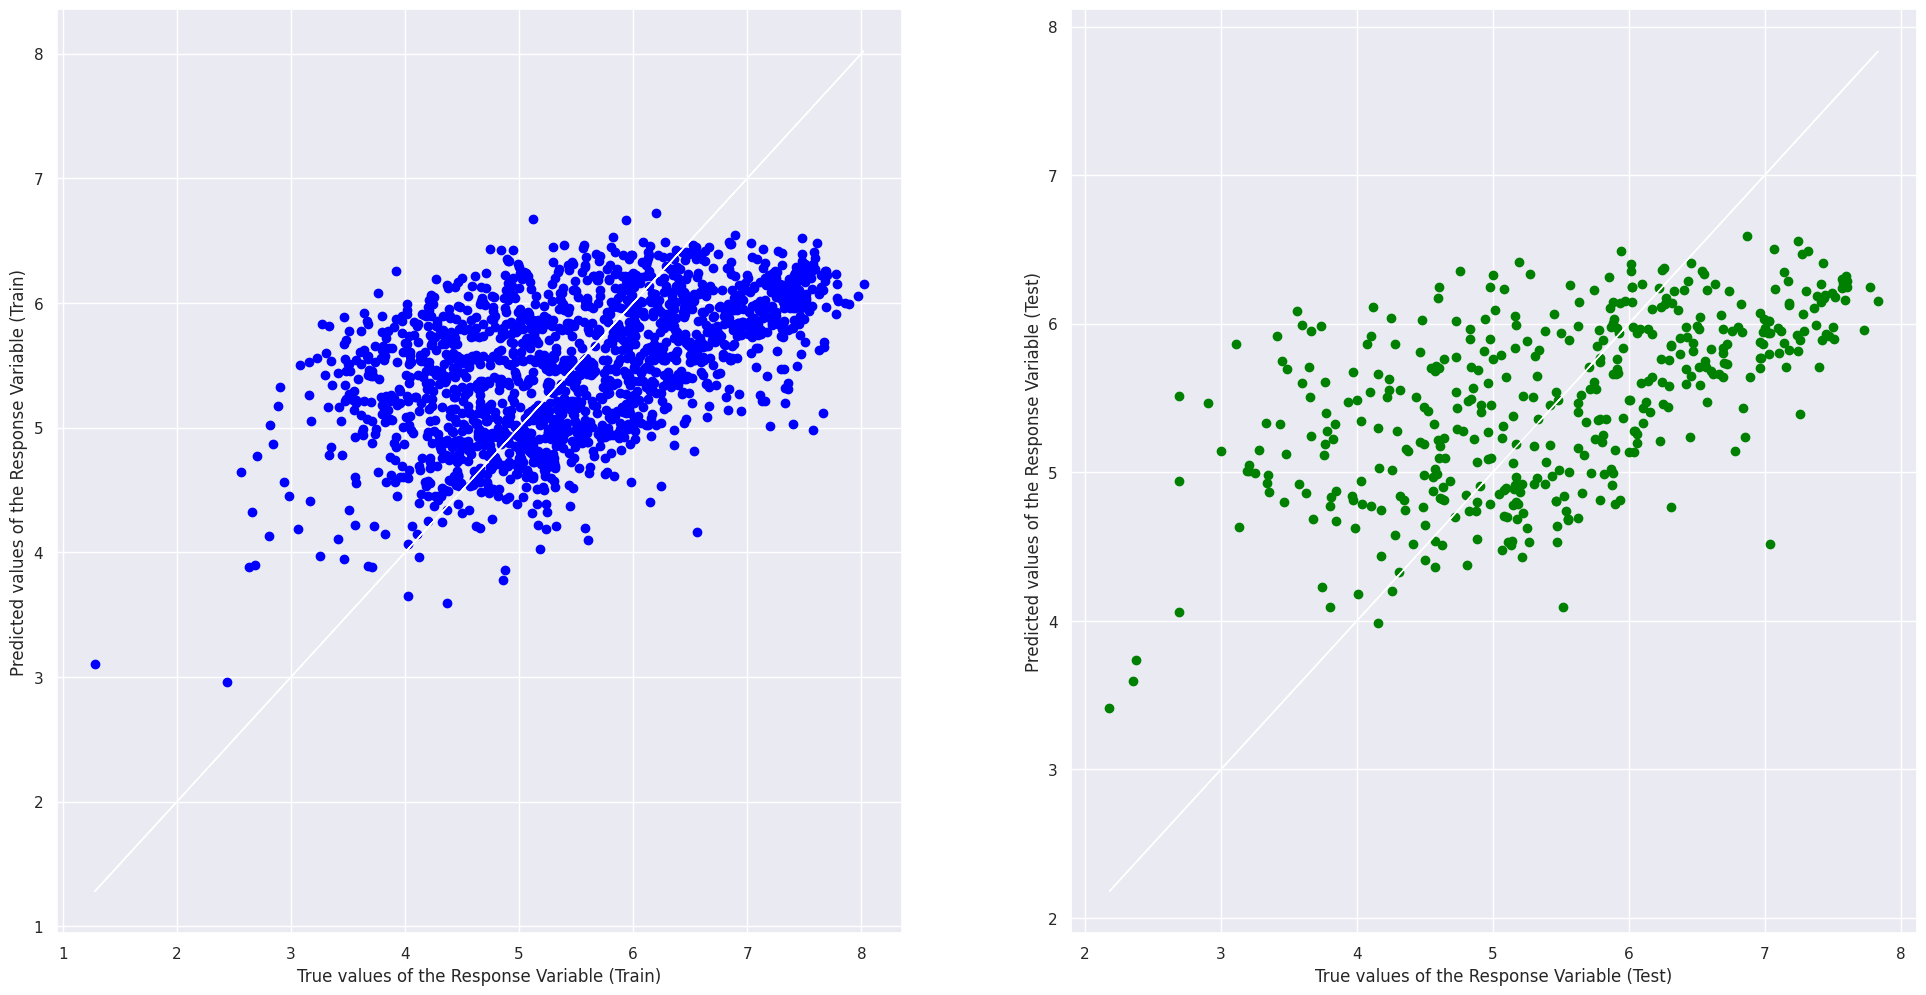

Explained Variance (R^2) on Train Set 	: 0.2519379546563827
Explained Variance (R^2) on Test Set 	: 0.3139596616935607
Mean Squared Error (MSE) on Train Set 	: 0.9153545936501155
Mean Squared Error (MSE) on Test Set 	: 0.985362223586768


In [20]:
#Uni-variate linear regression (Predictors: 'Postive affect')
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2['Positive affect'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

# Calculate the R^2 and MSE values for the training and test sets
r2_train_5 = linreg.score(x_train, y_train)
r2_test_5 = linreg.score(x_test, y_test)
mse_train_5 = mean_squared_error(y_train, y_train_pred)
mse_test_5 = mean_squared_error(y_test, y_test_pred)

### From our uni-variate models, the Explained Variance and Mean Squared Error values can be compared on a bar graph.

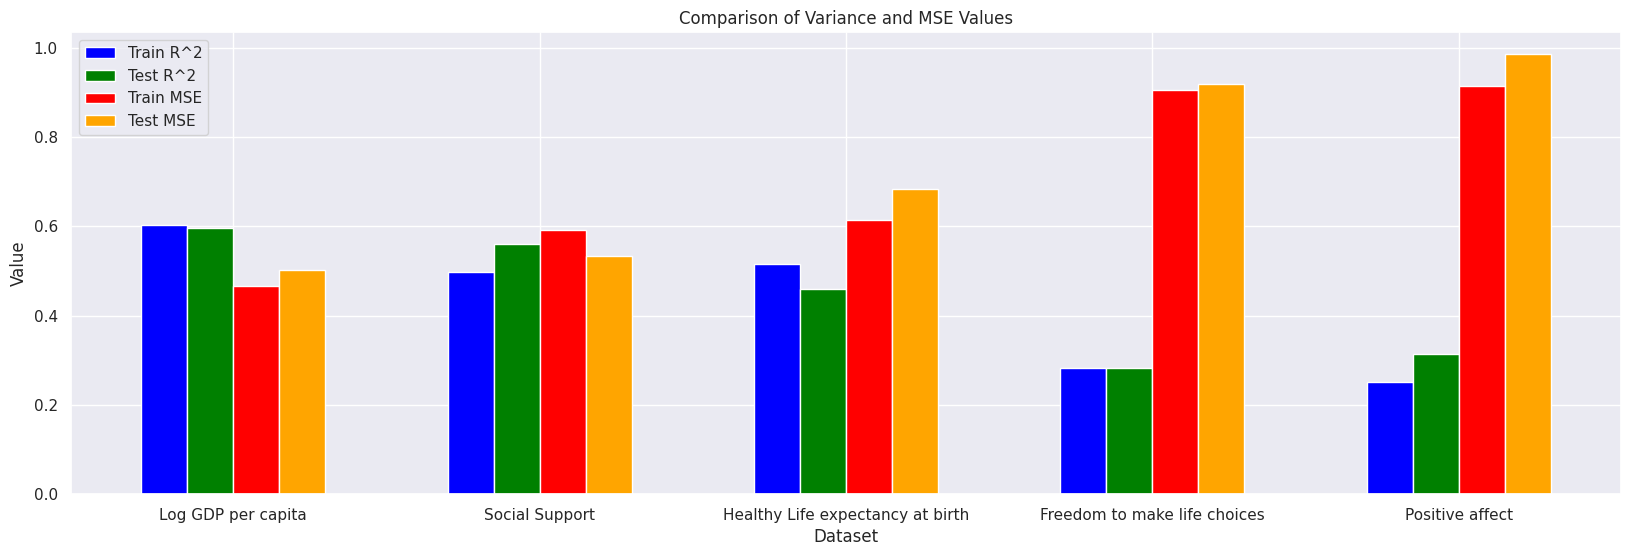

In [21]:
#combine the data into a single array
train_r2 = np.array([r2_train_1, r2_train_2, r2_train_3, r2_train_4, r2_train_5])
test_r2 = np.array([r2_test_1, r2_test_2, r2_test_3, r2_test_4, r2_test_5])
train_mse = np.array([mse_train_1, mse_train_2, mse_train_3, mse_train_4, mse_train_5])
test_mse = np.array([mse_test_1, mse_test_2, mse_test_3, mse_test_4, mse_test_5])

#create a bar graph to compare the values
labels = ['Log GDP per capita', 'Social Support', 'Healthy Life expectancy at birth', 'Freedom to make life choices', 'Positive affect']
x = np.arange(len(labels))
width = 0.15
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x - 1.5*width, train_r2, width, label='Train R^2', color='blue')
rects2 = ax.bar(x - 0.5*width, test_r2, width, label='Test R^2', color='green')
rects3 = ax.bar(x + 0.5*width, train_mse, width, label='Train MSE', color='red')
rects4 = ax.bar(x + 1.5*width, test_mse, width, label='Test MSE', color='orange')


# Add titles and labels to the graph
ax.set_title('Comparison of Variance and MSE Values')
ax.set_xlabel('Dataset')
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the graph
plt.show()


Based on the Explained Variance and MSE Values, the factors that are most likely to affect happiness in a country:

1. Log GDP per capita
2. Social Support
3. Healthy Life expectancy at birth
4. Freedom to make life choices
5. Positive affect

From the bar graph, we observe that the predictors, "Log GDP per capita", "Social support" and "Healthy life expectancy at birth" are the ones with highest Explained Variances and lowest MSE. These predictors seem to be most likely to affect happiness in a country.

Hence we decide to build a regression model solely using these predictors and see whether there are improvements compared to using the model that includes all predictors.

Train Set : (1759, 3) (1759, 1)
Test Set  : (440, 3) (440, 1)
Intercept 	: b =  [-2.65810847]
Coefficients 	: a =  [[0.3929633  3.22009419 0.02890752]]


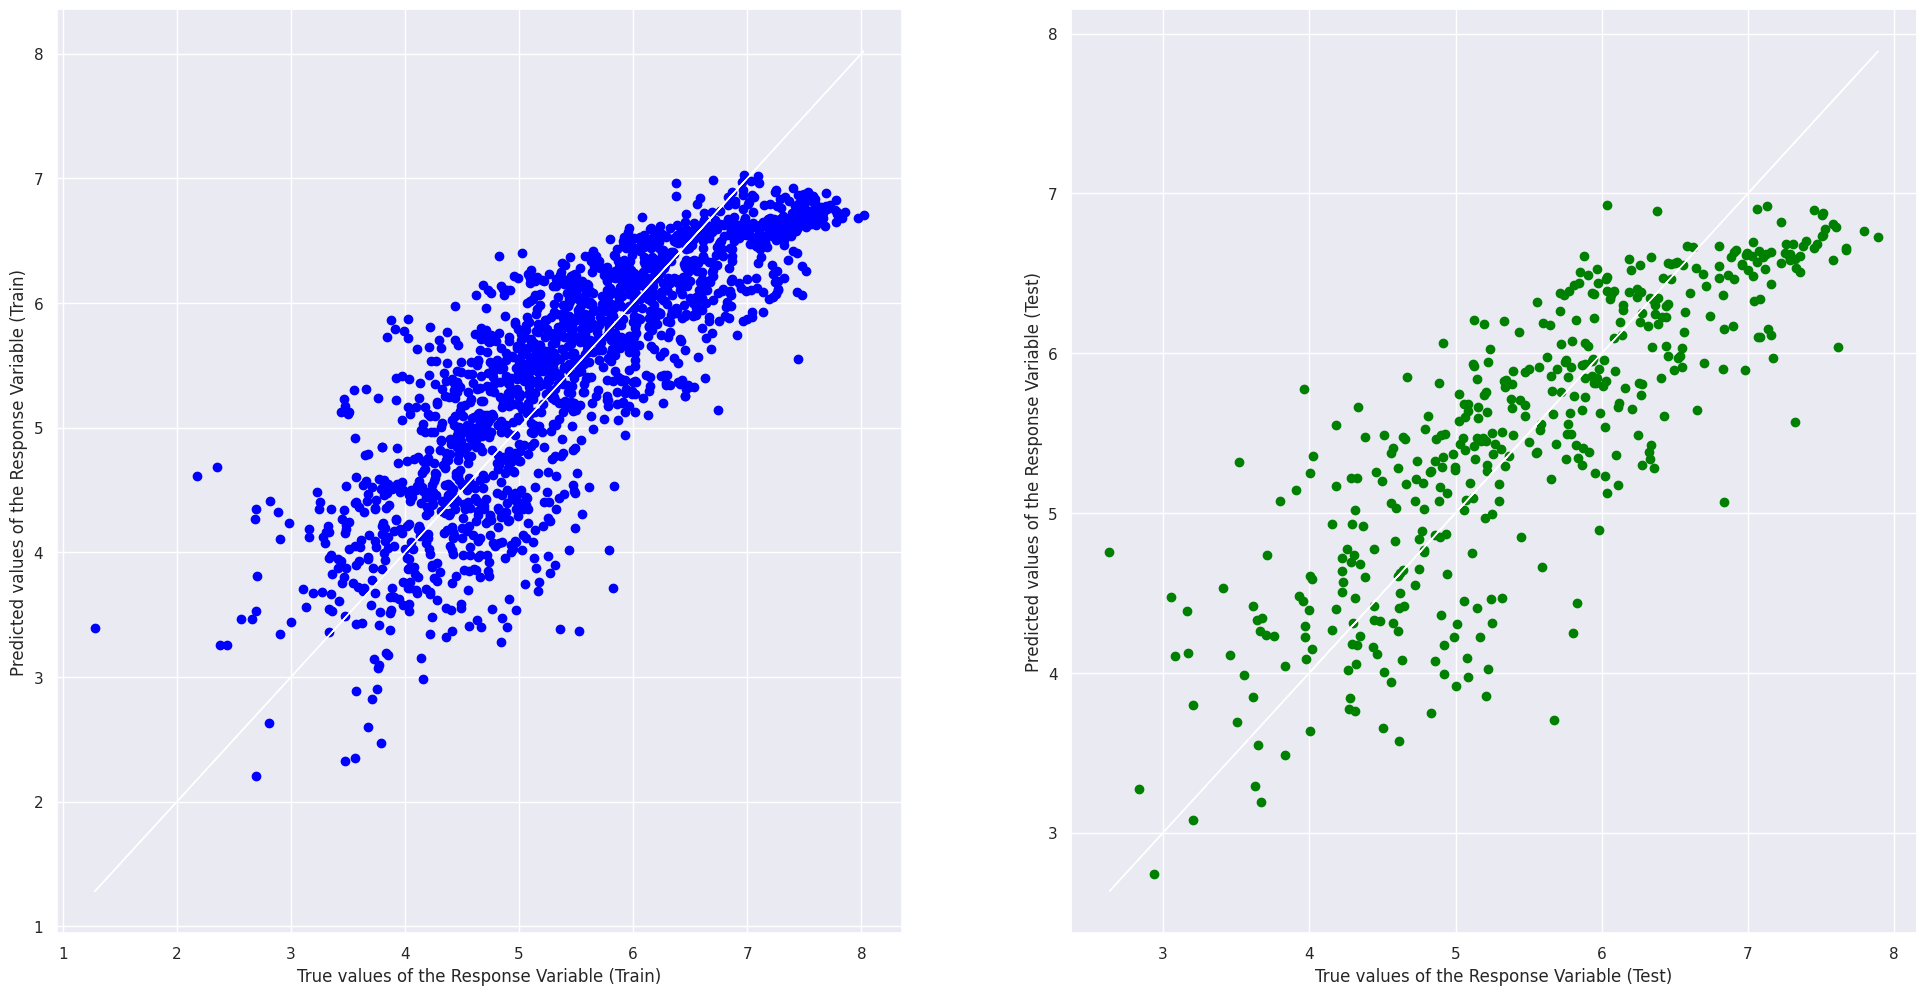

Explained Variance (R^2) on Train Set 	: 0.6884927573855744
Explained Variance (R^2) on Test Set 	: 0.6798261941672217
Mean Squared Error (MSE) on Train Set 	: 0.4004663307272195
Mean Squared Error (MSE) on Test Set 	: 0.3794959793556112


In [22]:
#Multi-variate linear regression (Predictors: 'Log GDP per capita','Social support','Healthy life expectancy at birth)
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth']])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

r2_train_6 = linreg.score(x_train, y_train)
r2_test_6 = linreg.score(x_test, y_test)
mse_train_6 = mean_squared_error(y_train, y_train_pred)
mse_test_6 = mean_squared_error(y_test, y_test_pred)

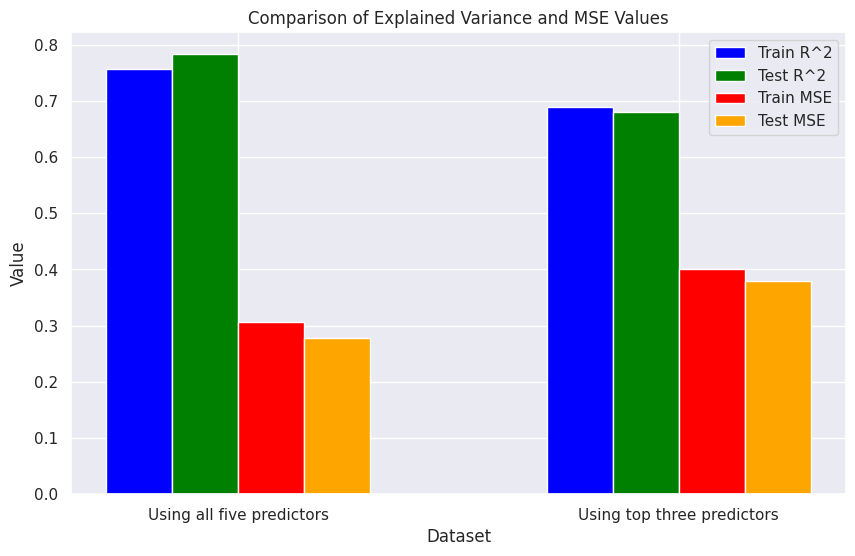

In [23]:
#combine the data into a single array
train_r2 = np.array([r2_train_0, r2_train_6])
test_r2 = np.array([r2_test_0, r2_test_6])
train_mse = np.array([mse_train_0, mse_train_6])
test_mse = np.array([mse_test_0, mse_test_6])

#create a bar graph to compare the values
labels = ['Using all five predictors', 'Using top three predictors']
x = np.arange(len(labels))
width = 0.15
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
rects1 = ax.bar(x - 1.5*width, train_r2, width, label='Train R^2', color='blue')
rects2 = ax.bar(x - 0.5*width, test_r2, width, label='Test R^2', color='green')
rects3 = ax.bar(x + 0.5*width, train_mse, width, label='Train MSE', color='red')
rects4 = ax.bar(x + 1.5*width, test_mse, width, label='Test MSE', color='orange')


# Add titles and labels to the graph
ax.set_title('Comparison of Explained Variance and MSE Values')
ax.set_xlabel('Dataset')
ax.set_ylabel('Value')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the graph
plt.show()


From the bar graph above, even though the predictors such as "Freedom to make life choices" and "Positive affect" is not reliable as a uni-variate model in predicing Life Ladder score, including all predictors still result in a higher Explained Variance and lower MSE compared to only using the top three predictors.





### Hence we will be using all five predictors in our models to predict life ladder score in a country. 

# Machine Learning

Since our predictors are entirely numerical, we have decided to use regression models to predict life ladder in a country. 

Hence, for this section, we will be looking for different regression models and comparing them to choose the best model in predicting the life ladder in a country.

We have chosen 3 new models:

1. K-fold multi-variate Linear Regression
2. Random Forest Regression
3. Ridge Regression 

Our metric to compare the models would be through the Explained Variance (R^2) and the Mean Squared Error (MSE) values of each model. The best model would be the one with highest R^2 and lowest MSE. This model would be most accurate in predicting future data for happiness in a country.

#### K-fold Multi-Variate Linear Regression

K-fold linear regression is a variant of the linear regression algorithm that uses k-fold cross-validation to evaluate the performance of the model and improve its accuracy. K-fold linear regression is an effective technique for evaluating the performance of a linear regression model and for improving its accuracy. By using k-fold cross-validation, it is possible to obtain a more accurate estimate of the model's performance and to avoid overfitting.


#### Random Forest Regression

Random forest regression uses an ensemble of decision trees to perform regression tasks. In a random forest, multiple decision trees are trained independently on different subsets of the data, and their predictions are combined to make a final prediction. Random forest regression can improve accuracy in regression tasks by reducing overfitting, combining predictions, and handling noisy data.

#### Ridge Regression

Ridge Regression uses L2 regularization to prevent overfitting, and it can be particularly useful for small datasets where overfitting is more likely to occur. By adding a penalty term to the loss function that penalizes large values of the model's coefficients, Ridge Regression can help to prevent the model from fitting too closely to the noise in the data.

## Multi-Variate Linear Regression

Train Set : (1759, 5) (1759, 1)
Test Set  : (440, 5) (440, 1)
Intercept 	: b =  [-3.91653884]
Coefficients 	: a =  [[0.3796959  1.95389847 0.03012911 0.89323661 2.58021401]]


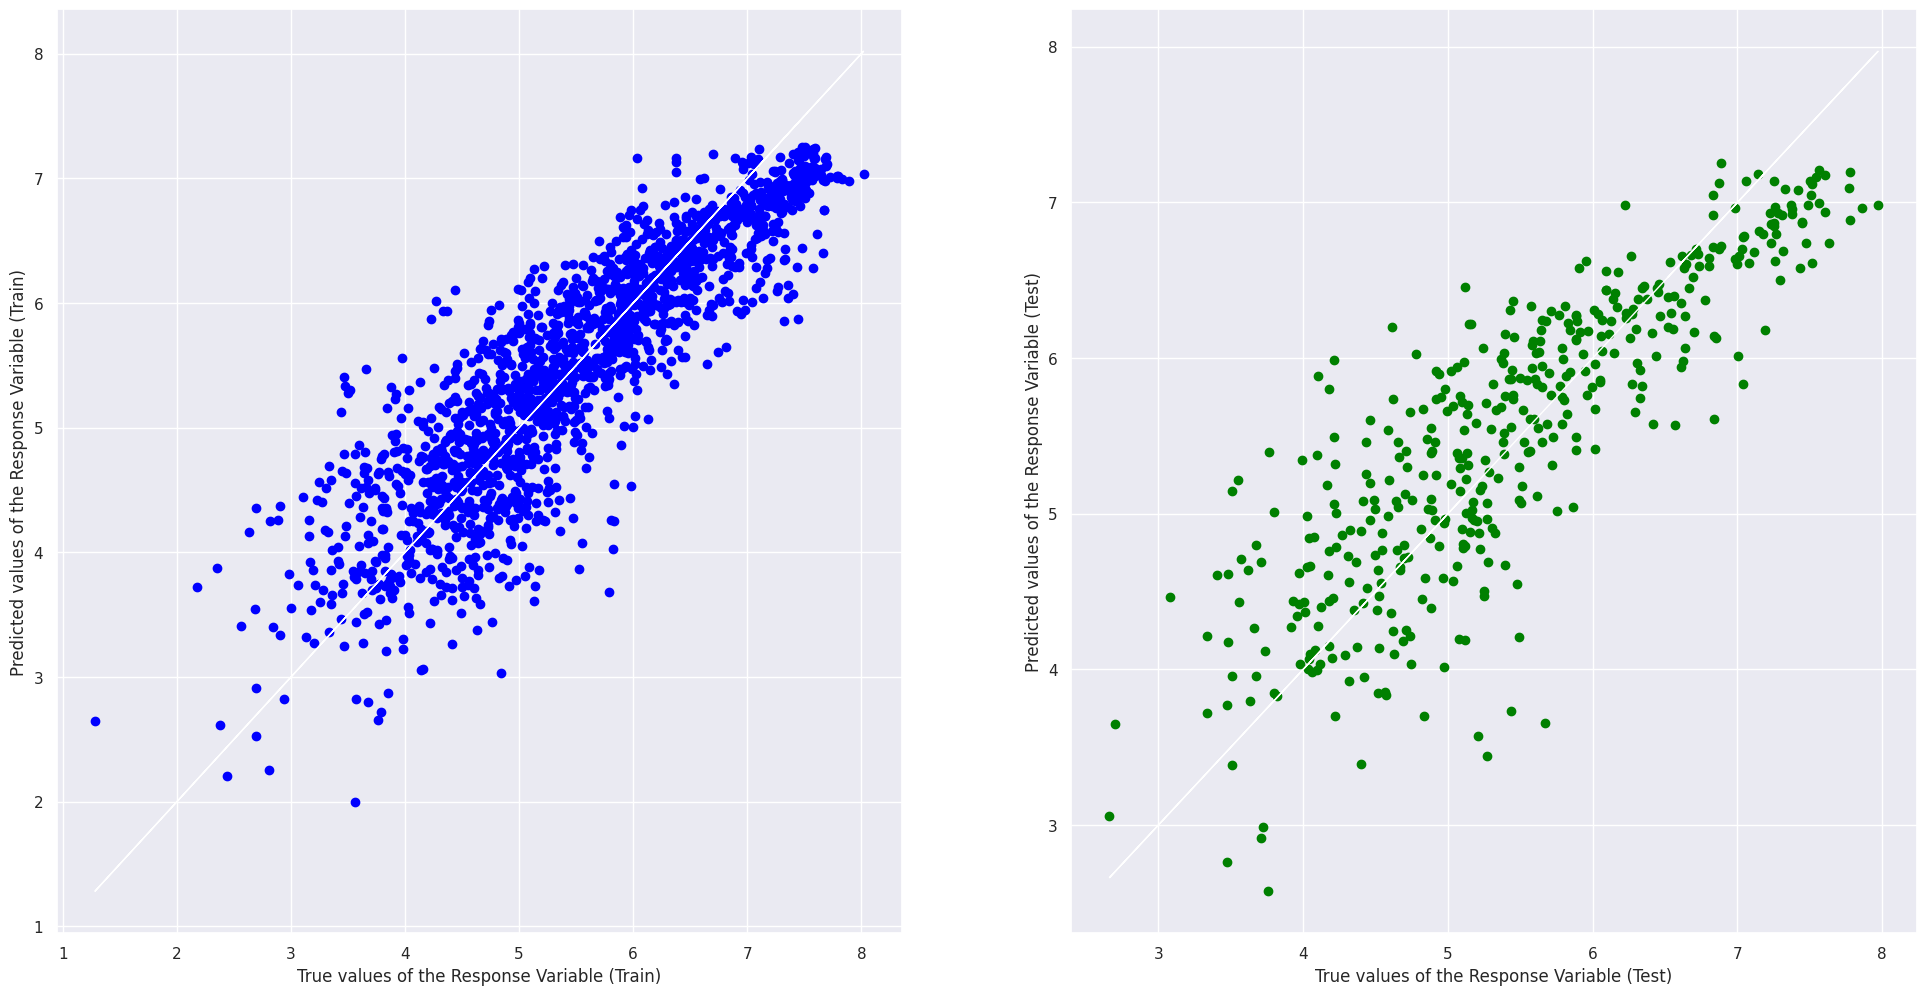

Explained Variance (R^2) on Train Set 	: 0.7728907096386477
Explained Variance (R^2) on Test Set 	: 0.7132006387550359
Mean Squared Error (MSE) on Train Set 	: 0.2900066386473635
Mean Squared Error (MSE) on Test Set 	: 0.3504952609069747


In [28]:
#Multi-variate linear regression (Predictors: 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect')
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

linreg = LinearRegression()

linreg.fit(x_train,y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))


r2score = linreg.score(x_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)


## K-fold Multi-Variate Linear Regression

Goodness of Fit of Model 	
Scores of the model is 	: [0.77998985 0.73906042 0.76319354 0.75342407 0.76717682]
Explained Variance (R^2) 	: 0.760568943297842
Mean Squared Error (MSE) 	: 0.3028501253440512



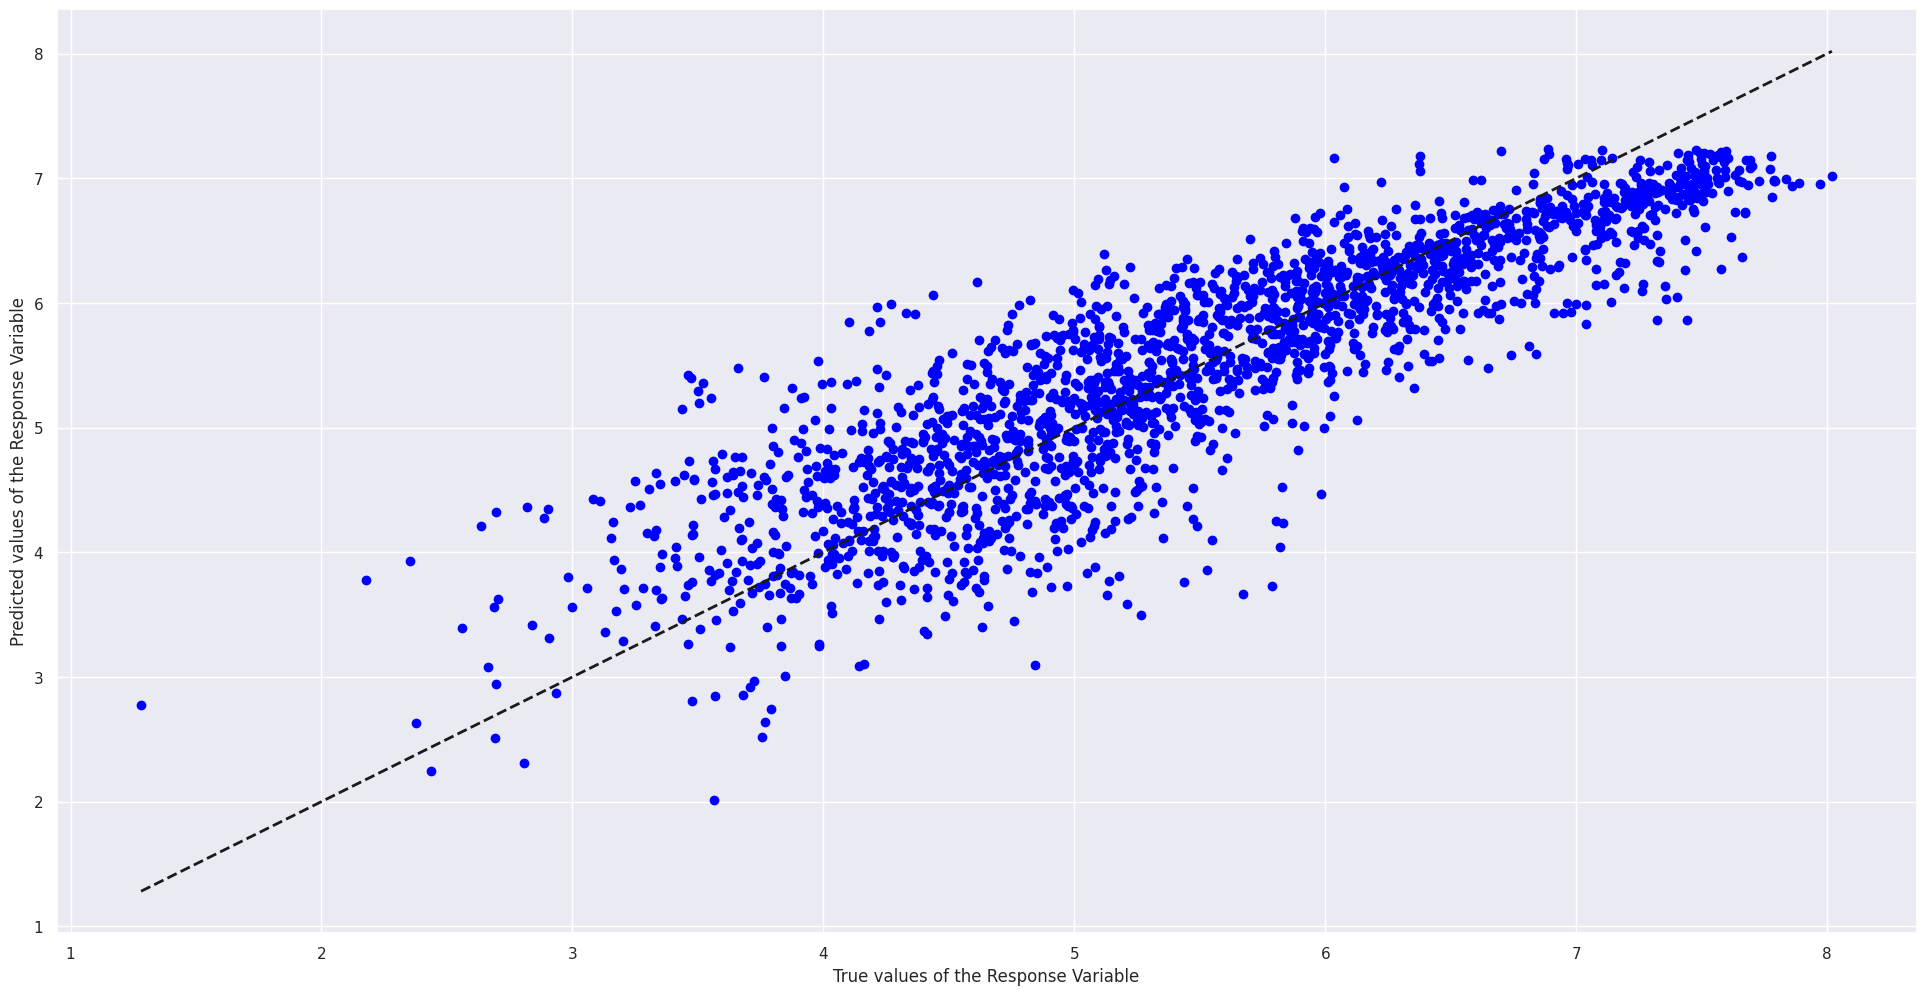

In [26]:
#using k fold
y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])


kf = KFold(n_splits=5, random_state=1, shuffle=True)
linreg = LinearRegression()
scores = cross_val_score(linreg, x, y, scoring = 'explained_variance', cv = kf)
y_predicted = cross_val_predict(linreg, x, y, cv = kf)

fig, ax = plt.subplots(1, 1, figsize=(24, 12))
ax.scatter(y, y_predicted, color = "blue")
ax.plot([y.min(),y.max()],[y.min(),y.max()], 'k--', lw =2)
ax.set_xlabel("True values of the Response Variable")
ax.set_ylabel("Predicted values of the Response Variable")
plt.show

print("Goodness of Fit of Model \t")
print("Scores of the model is \t:", scores)
print("Explained Variance (R^2) \t:", scores.mean())
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_predicted))
r2_linreg = scores.mean()
print()

kfoldscore = scores.mean()
kfoldmse = mean_squared_error(y, y_predicted)

## Random Forest Regression

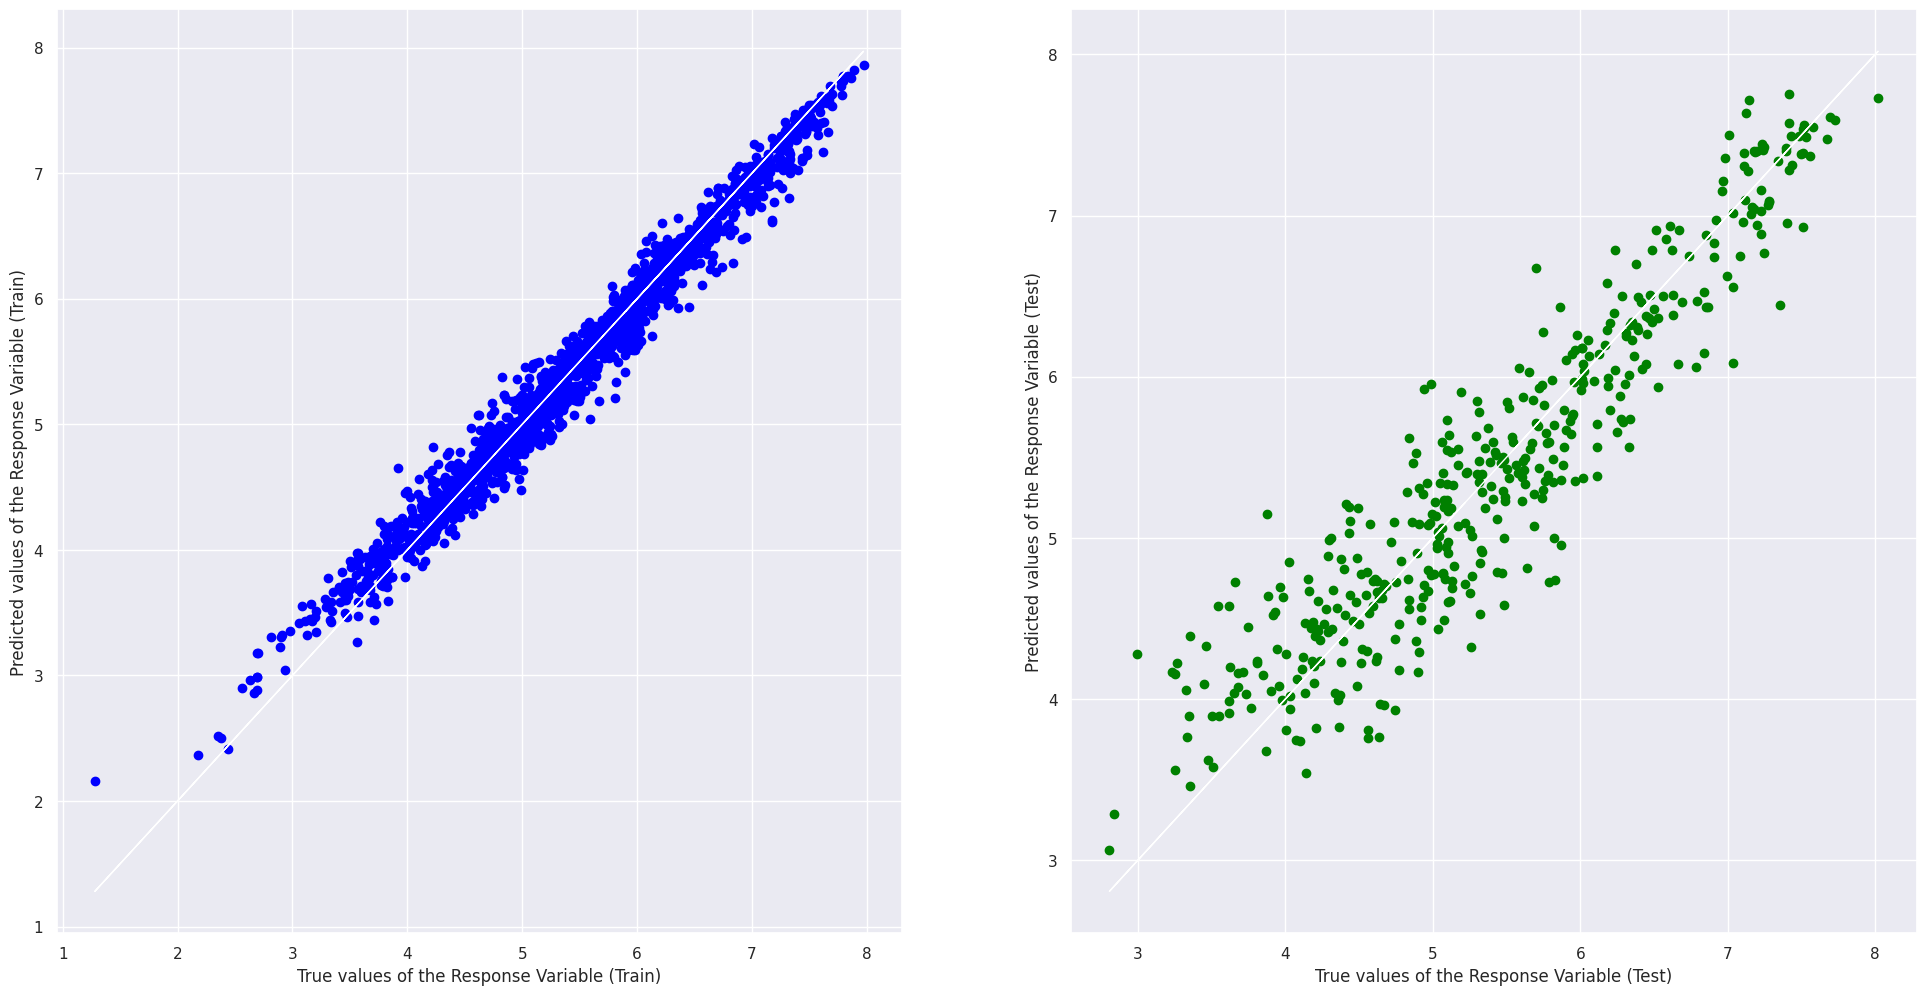

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9788392091920098
Mean Squared Error (MSE) 	: 0.026830820466515026

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8692212942626243
Mean Squared Error (MSE) 	: 0.16409073547545447



In [29]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor


y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rand_forest = RandomForestRegressor()

rand_forest.fit(X_train,y_train.values.ravel())

# Predict Response corresponding to Predictors
y_train_pred = rand_forest.predict(X_train)
y_test_pred = rand_forest.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rand_forest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rand_forest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

rfrscore = rand_forest.score (X_test, y_test)
rfrmse = mean_squared_error(y_test, y_test_pred)

## Ridge Regression

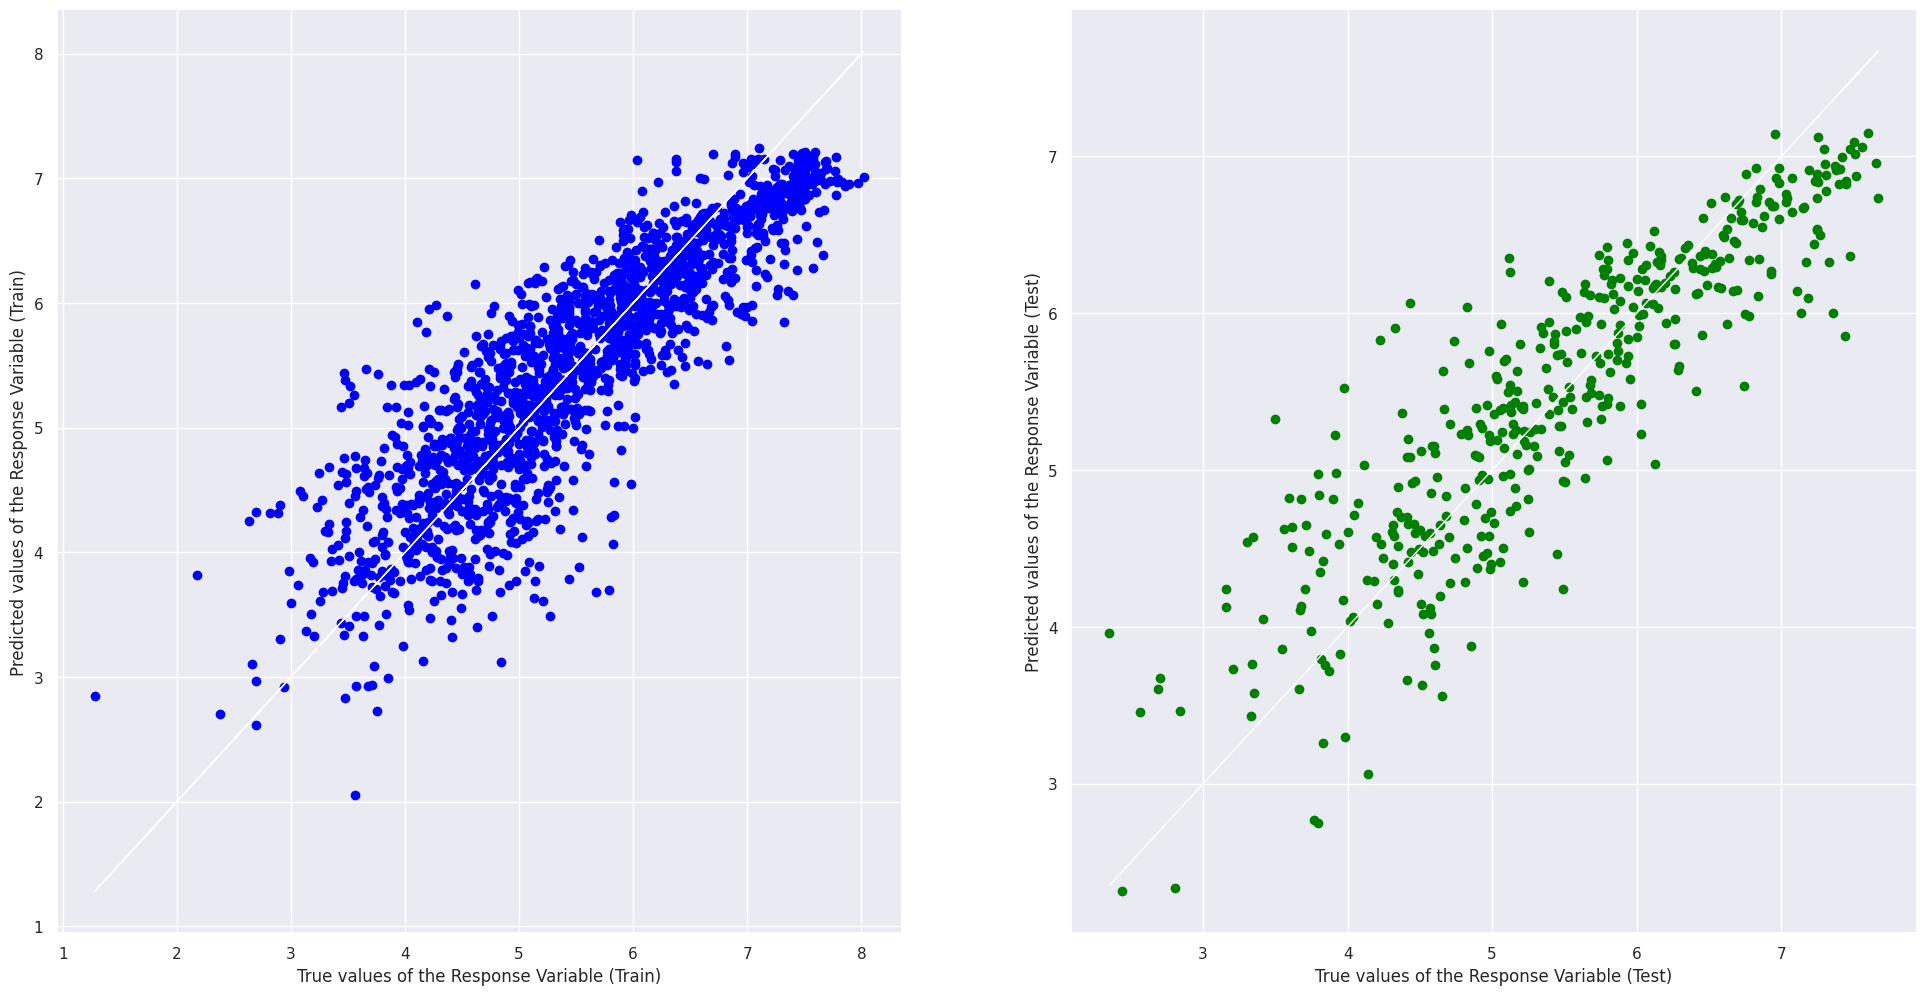

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7578618429784441
Mean Squared Error (MSE) 	: 0.30564109413441154

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7760516438937128
Mean Squared Error (MSE) 	: 0.2869751411774997



In [32]:
#using ridge regression

from sklearn.linear_model import Ridge

y = pd.DataFrame(dfclean2['Life Ladder'])
x = pd.DataFrame(dfclean2[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = Ridge(alpha=0.5)
model.fit(X_train, y_train)

# Predict Response corresponding to Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

rrscore = model.score (X_test, y_test)
rrmse = mean_squared_error(y_test, y_test_pred)

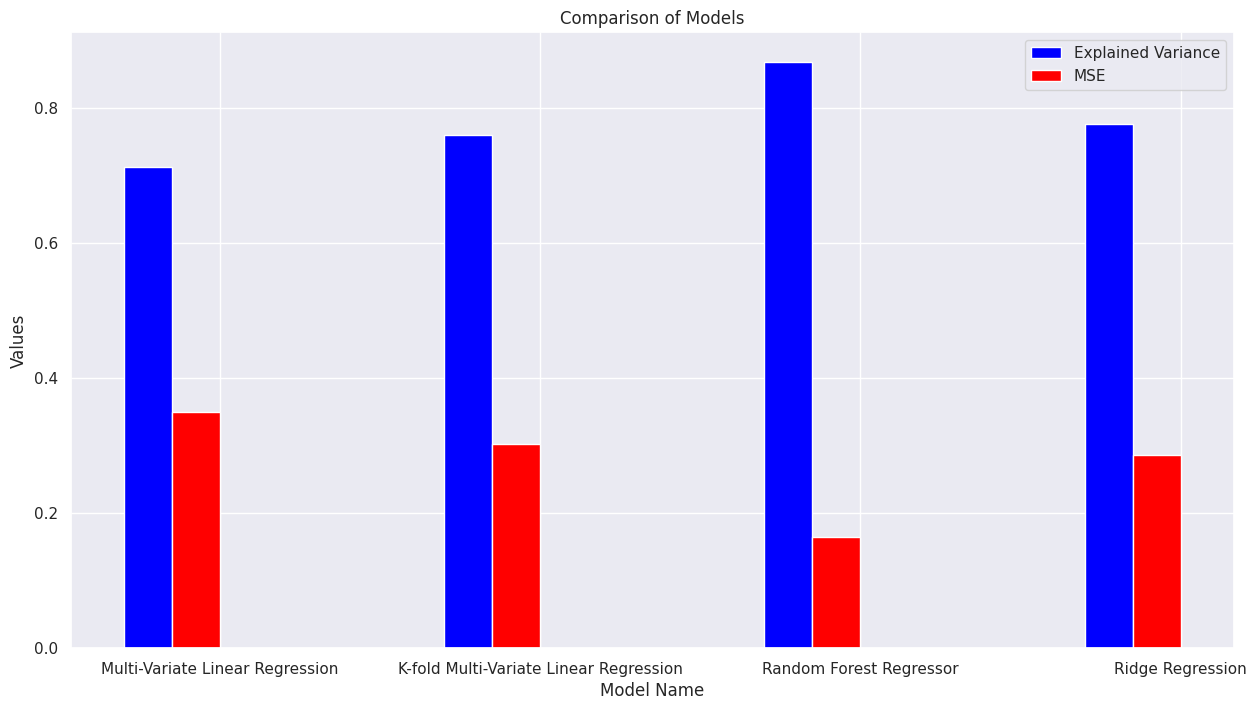


Variance Scores
Multi-Variate Linear Regression:  0.7132006387550359
K-fold Multi-Variate Linear Regression:  0.760568943297842
Random Forest Regression:  0.8692212942626243
Ridge Regression:  0.7760516438937128

MSE Scores
Multi-Variate Linear Regression:  0.3504952609069747
K-fold Multi-Variate Linear Regression:  0.3028501253440512
Random Forest Regressor:  0.16409073547545447
Ridge Regression:  0.2869751411774997


In [33]:
#combine the data into a single array
variances = np.array([r2score, kfoldscore, rfrscore, rrscore])
mses = np.array([mse, kfoldmse, rfrmse, rrmse])

#create a bar graph to compare the values
labels = ['Multi-Variate Linear Regression', 'K-fold Multi-Variate Linear Regression', 'Random Forest Regressor', 'Ridge Regression']
x = np.arange(len(labels))
width = 0.15
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
rects1 = ax.bar(x - 1.5*width, variances, width, label='Explained Variance', color='blue')
rects2 = ax.bar(x - 0.5*width, mses, width, label='MSE', color='red')

# Add titles and labels to the graph
ax.set_title('Comparison of Models')
ax.set_xlabel('Model Name')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the graph
plt.show()

print()

print("Variance Scores")
print("Multi-Variate Linear Regression: ", r2score)
print("K-fold Multi-Variate Linear Regression: ", kfoldscore)
print("Random Forest Regression: ", rfrscore)
print("Ridge Regression: ", rrscore)

print()

print("MSE Scores")
print("Multi-Variate Linear Regression: ", mse)
print("K-fold Multi-Variate Linear Regression: ", kfoldmse)
print("Random Forest Regressor: ", rfrmse)
print("Ridge Regression: ", rrmse)

Comparing all the Explained Variances (R^2) and MSE scores of each model, we can clearly see that Random Forest Regressor is the best model in predicting happiness in a country as it has the highest R^2 and lowest MSE. 

# Conclusion

In conclusion, to answer our problem statement at the start of our project, we have found that the most important factors in predicting happiness in a country is: 

### Most Important Factors

1. GDP per capita
2. Social Support
3. Healthy life expectancy at birth

### Random Forest Regressor is the most accurate model
We also found that the Random Forest Regressor model to be the most accurate in predicting happiness in a country based on these factors.

# Recommendations

Therefore, we recommend that the Singapore government, in order to maintain its position in being the happiest country in Asia, should prioritise maximising these factors. In order to predict its score relative to other countries, Singapore government could consider using the Random Forest Regressor models in order to compare its performance against other countries.